<a href="https://colab.research.google.com/github/saugata-malakar/ML-CaPsule/blob/master/Trinakshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: import all ml libs

import tensorflow as tf
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset without parsing dates initially
# This helps us inspect the column names first
try:
    df = pd.read_csv("/content/manager_x_week_data.csv")

    # Print column names to check for 'week_date'
    print("Columns in the CSV file:")
    print(df.columns.tolist())

    # If 'week_date' or a similar column is found, correct the parse_dates line.
    # If not, you need to investigate the content of your CSV file.

    # **Assuming 'week_date' exists and the initial error was just a fluke or leading zeros/whitespace issues.**
    # If the column name printed above *is* exactly 'week_date',
    # then try reading again with parse_dates. Sometimes leading/trailing spaces
    # in the column header can cause issues, though less common with pandas read_csv.
    # If you found a *different* column name (e.g., 'Week_Date'), use that name in parse_dates.

    # Example: If the column was found as 'Week_Date', change the next line to:
    # df = pd.read_csv("/content/manager_x_week_data.csv", parse_dates=['Week_Date'])

    # Assuming the column is indeed named 'week_date' after verification:
    df = pd.read_csv("/content/manager_x_week_data.csv", parse_dates=['week_date'])


    # Step 3: Check basic structure
    print("\nShape of dataset:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nFirst 5 rows:\n", df.head())

    # Step 4: Sort the data by empid and week_date for time-series operations
    df_sorted = df.sort_values(by=['empid', 'week_date']).reset_index(drop=True)

    # Step 5: Optional — check for missing values
    print("\nMissing values per column:\n", df_sorted.isnull().sum())

    # Step 6: Inspect data types
    print("\nData types:\n", df_sorted.dtypes)

except FileNotFoundError:
    print("Error: The file '/content/manager_x_week_data.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file '/content/manager_x_week_data.csv' was not found.


In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset (use 'tw_issued_on' as the date column)
df = pd.read_csv("/content/manager_x_week_data.csv", parse_dates=['tw_issued_on'])

# Step 3: Rename for consistency (optional but helps)
df = df.rename(columns={'tw_issued_on': 'week_date'})

# Step 4: Check basic structure
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

# Step 5: Sort the data by empid and week_date for time-series operations
df_sorted = df.sort_values(by=['empid', 'week_date']).reset_index(drop=True)

# Step 6: Optional — check for missing values
print("\nMissing values per column:\n", df_sorted.isnull().sum())

# Step 7: Inspect data types
print("\nData types:\n", df_sorted.dtypes)


Shape of dataset: (20839, 13)

Columns: ['empid', 'week_date', 'masked_userid', 'move_it', 'relative_time_i', 'nmoves_i', 'desig_name', 'dept', 'n_services', 'n_apps', 'process_days_bus', 'delay1', 'district_name']

First 5 rows:
    empid week_date  masked_userid  move_it  relative_time_i  nmoves_i  \
0     95    2022w9            188        0              -11         1   
1     95   2022w20            984        1                0         1   
2     95   2022w22            984        0                2         1   
3     95   2022w27            984        0                7         1   
4     95   2022w35            984        0               15         1   

  desig_name dept  n_services  n_apps  process_days_bus    delay1  \
0        sdm  rev           1       1         26.000000  0.000100   
1        sdm  rev           2       3         12.666667  0.333333   
2        sdm  rev           1       1         50.000000  1.000000   
3        sdm  rev           1       1          6.00000

<ipython-input-9-895bdd80ebf5>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/manager_x_week_data.csv", parse_dates=['tw_issued_on'])


In [10]:
# Basic summary
print(df_sorted.describe(include='all'))

# Unique counts
print("\nUnique employees:", df_sorted['empid'].nunique())
print("Unique offices:", df_sorted['masked_userid'].nunique())
print("Unique departments:", df_sorted['dept'].nunique())
print("Unique designations:", df_sorted['desig_name'].nunique())


                empid week_date  masked_userid       move_it  relative_time_i  \
count    20839.000000     20839   20839.000000  20839.000000     20839.000000   
unique            NaN       104            NaN           NaN              NaN   
top               NaN   2022w21            NaN           NaN              NaN   
freq              NaN       280            NaN           NaN              NaN   
mean     42009.384999       NaN     552.683094      0.024713        -2.427132   
std      44961.225946       NaN     329.115390      0.155254        30.977879   
min         95.000000       NaN       2.000000      0.000000      -103.000000   
25%       6609.000000       NaN     260.000000      0.000000       -21.000000   
50%      19021.000000       NaN     532.000000      0.000000        -1.000000   
75%     104747.000000       NaN     829.000000      0.000000        16.000000   
max     150801.000000       NaN    1126.000000      1.000000       100.000000   

            nmoves_i desig_


Employees ever transferred: 515 out of 569


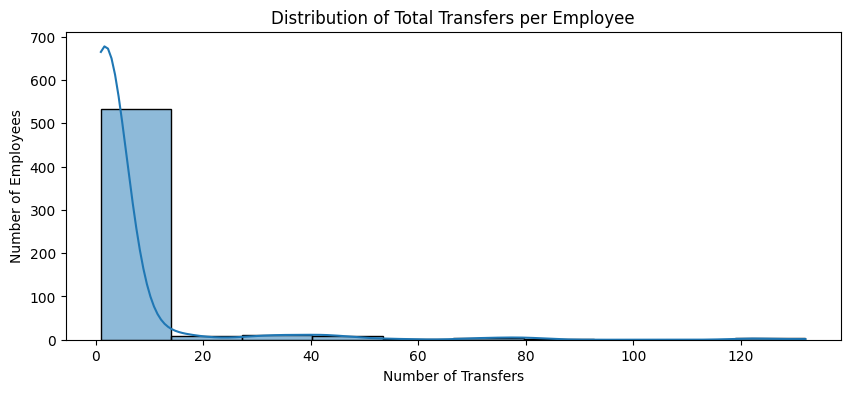

In [11]:
# How many employees were ever transferred?
ever_transferred = df_sorted.groupby('empid')['move_it'].sum().gt(0).sum()
print(f"\nEmployees ever transferred: {ever_transferred} out of {df_sorted['empid'].nunique()}")

# Distribution of number of moves
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df_sorted.drop_duplicates('empid')['nmoves_i'], bins=10, kde=True)
plt.title('Distribution of Total Transfers per Employee')
plt.xlabel('Number of Transfers')
plt.ylabel('Number of Employees')
plt.show()



Summary Statistics for Performance Metrics:
             n_apps  process_days_bus        delay1
count  20839.000000      20839.000000  20839.000000
mean      73.069629         10.888572      0.172616
std      123.342395         15.070957      0.262880
min        1.000000          1.000000      0.000100
25%        7.000000          3.208333      0.000100
50%       28.000000          6.377049      0.048780
75%       80.000000         12.691540      0.219717
max     1557.000000        372.000000      1.000000

Correlation Matrix:
                    n_apps  process_days_bus    delay1
n_apps            1.000000         -0.009810 -0.072921
process_days_bus -0.009810          1.000000  0.680917
delay1           -0.072921          0.680917  1.000000


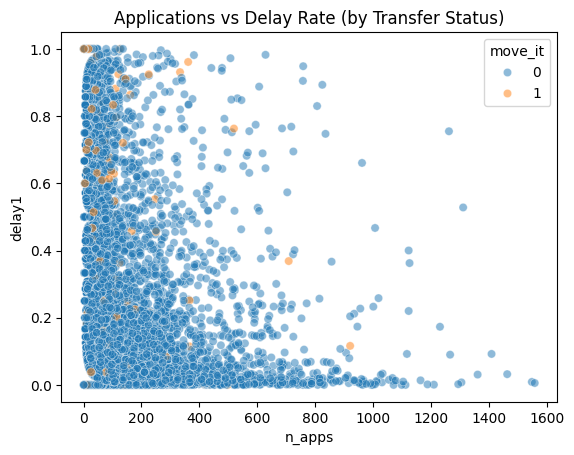

In [12]:
# Summary stats for performance metrics
performance_cols = ['n_apps', 'process_days_bus', 'delay1']
print("\nSummary Statistics for Performance Metrics:")
print(df_sorted[performance_cols].describe())

# Correlation matrix
print("\nCorrelation Matrix:")
print(df_sorted[performance_cols].corr())

# Scatter: Applications vs Delay
sns.scatterplot(data=df_sorted, x='n_apps', y='delay1', hue='move_it', alpha=0.5)
plt.title('Applications vs Delay Rate (by Transfer Status)')
plt.show()


In [13]:
# Office-level average processing time & delay
office_perf = df_sorted.groupby('masked_userid')[['process_days_bus', 'delay1']].mean().sort_values('process_days_bus')

print("\nTop 5 High Performing Offices (Lowest Processing Time):")
print(office_perf.head())

print("\nBottom 5 Performing Offices (Highest Processing Time):")
print(office_perf.tail())



Top 5 High Performing Offices (Lowest Processing Time):
               process_days_bus    delay1
masked_userid                            
724                    1.025974  0.000100
393                    1.077440  0.000100
1108                   1.078431  0.000100
405                    1.174266  0.004050
372                    1.433241  0.005451

Bottom 5 Performing Offices (Highest Processing Time):
               process_days_bus    delay1
masked_userid                            
128                   80.428205  0.903854
807                   90.111667  0.790506
622                   90.363637  0.761382
1030                 103.806945  0.793056
906                  106.333333  0.666700


In [14]:
# Group by whether moved or not, get weekly averages
grouped = df_sorted.groupby('move_it')[['n_apps', 'process_days_bus', 'delay1']].mean()
print("\nPerformance Comparison: Transferred vs Not Transferred")
print(grouped)



Performance Comparison: Transferred vs Not Transferred
            n_apps  process_days_bus    delay1
move_it                                       
0        73.641360         10.792076  0.170296
1        50.506796         14.696696  0.264195


In [15]:
# Create a copy to avoid modifying original
df_transfer = df_sorted.copy()

# Keep only pre-transfer weeks
df_transfer = df_transfer[df_transfer['relative_time_i'].between(-12, -1)]

# Tag the window type
def get_window_label(x):
    if x >= -4: return 'pre_4'
    elif x >= -8: return 'pre_8'
    else: return 'pre_12'

df_transfer['window'] = df_transfer['relative_time_i'].apply(get_window_label)


In [16]:
# Weighted average by n_apps for each employee-window group
pre_perf = df_transfer.groupby(['empid', 'window']).apply(
    lambda g: pd.Series({
        'wavg_delay1': np.average(g['delay1'], weights=g['n_apps']),
        'wavg_process_days': np.average(g['process_days_bus'], weights=g['n_apps']),
        'total_apps': g['n_apps'].sum()
    })
).reset_index()

# Pivot to view in wide form
pre_perf_wide = pre_perf.pivot(index='empid', columns='window')
pre_perf_wide.columns = ['_'.join(col).strip() for col in pre_perf_wide.columns.values]
pre_perf_wide = pre_perf_wide.reset_index()

pre_perf_wide.head()


<ipython-input-16-02970e830ea3>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pre_perf = df_transfer.groupby(['empid', 'window']).apply(


,empid,wavg_delay1_pre_12,wavg_delay1_pre_4,wavg_delay1_pre_8,wavg_process_days_pre_12,wavg_process_days_pre_4,wavg_process_days_pre_8,total_apps_pre_12,total_apps_pre_4,total_apps_pre_8
0,95,0.000100,NaN,NaN,26.000000,NaN,NaN,1.0,NaN,NaN
1,2386,0.000100,0.000100,0.00010,7.500000,2.666667,9.692308,14.0,3.0,13.0
2,3069,1.000000,NaN,NaN,35.000000,NaN,NaN,1.0,NaN,NaN
3,3085,0.242325,0.048780,0.08992,13.943174,13.664165,14.316151,1531.0,1066.0,1746.0
4,3088,NaN,0.294785,NaN,NaN,16.401361,NaN,NaN,441.0,NaN


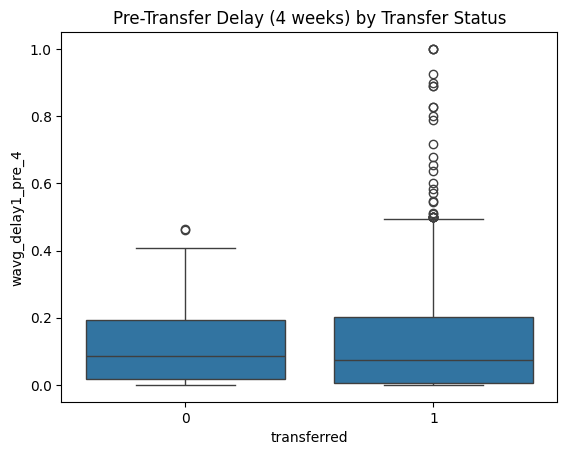

T-test result: t = 1.435, p = 0.154


In [17]:
# Label whether employee was transferred
df_emp = df_sorted.groupby('empid').agg({
    'move_it': 'sum',
    'nmoves_i': 'max'
}).reset_index()
df_emp['transferred'] = (df_emp['move_it'] > 0).astype(int)

# Merge with performance data
emp_perf_compare = df_emp.merge(pre_perf_wide, on='empid')

# Statistical summary
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.boxplot(x='transferred', y='wavg_delay1_pre_4', data=emp_perf_compare)
plt.title("Pre-Transfer Delay (4 weeks) by Transfer Status")
plt.show()

# t-test: is pre-transfer delay significantly higher for transferred employees?
t_stat, p_val = stats.ttest_ind(
    emp_perf_compare[emp_perf_compare['transferred']==1]['wavg_delay1_pre_4'].dropna(),
    emp_perf_compare[emp_perf_compare['transferred']==0]['wavg_delay1_pre_4'].dropna(),
    equal_var=False
)
print(f"T-test result: t = {t_stat:.3f}, p = {p_val:.3f}")


In [18]:
# Get average delay1 for each office (overall performance)
office_perf = df_sorted.groupby('masked_userid').agg({
    'delay1': lambda x: np.average(x, weights=df_sorted.loc[x.index, 'n_apps'])
}).rename(columns={'delay1': 'office_perf_score'}).reset_index()

# Bucket offices into high/low (quartiles)
office_perf['perf_bucket'] = pd.qcut(office_perf['office_perf_score'], q=4, labels=['high', 'mid-high', 'mid-low', 'low'])


<ipython-input-19-3bf478abe1ef>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pre4_avg = df_transfer[df_transfer['relative_time_i'] >= -4].groupby('empid').apply(


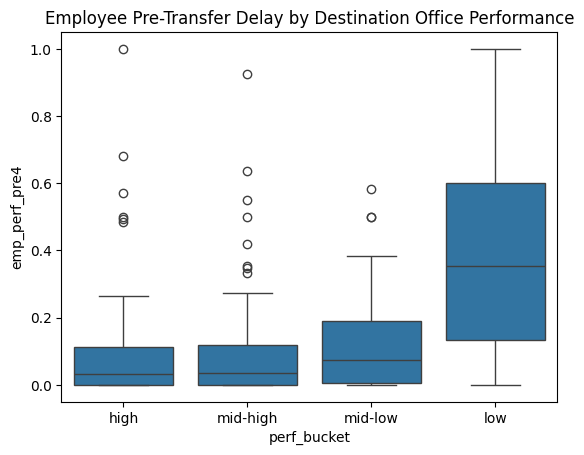

In [19]:
# Extract actual transfer weeks
df_moves = df_sorted[df_sorted['move_it'] == 1][['empid', 'week_date', 'masked_userid']].copy()
df_moves = df_moves.rename(columns={'week_date': 'transfer_week', 'masked_userid': 'to_office'})

# Get previous 4-week average performance
pre4_avg = df_transfer[df_transfer['relative_time_i'] >= -4].groupby('empid').apply(
    lambda g: np.average(g['delay1'], weights=g['n_apps'])
).reset_index(name='emp_perf_pre4')

# Merge with transfer destination
emp_to_office = df_moves.drop_duplicates('empid').merge(pre4_avg, on='empid')

# Merge with office performance bucket
emp_to_office = emp_to_office.merge(office_perf[['masked_userid', 'perf_bucket']], left_on='to_office', right_on='masked_userid', how='left')

# Plot: Employee pre-transfer delay vs destination office bucket
sns.boxplot(x='perf_bucket', y='emp_perf_pre4', data=emp_to_office)
plt.title("Employee Pre-Transfer Delay by Destination Office Performance")
plt.show()


In [20]:
# Group by office performance bucket
bucket_means = emp_to_office.groupby('perf_bucket')['emp_perf_pre4'].mean()
print("\nAverage Pre-Transfer Employee Delay by Destination Office Bucket:")
print(bucket_means)

# ANOVA test: Do group means differ?
f_val, p_val = stats.f_oneway(
    *[group['emp_perf_pre4'].dropna().values for name, group in emp_to_office.groupby('perf_bucket')]
)
print(f"\nANOVA Result: F = {f_val:.2f}, p = {p_val:.4f}")



Average Pre-Transfer Employee Delay by Destination Office Bucket:
perf_bucket
high        0.106257
mid-high    0.102742
mid-low     0.125158
low         0.402355
Name: emp_perf_pre4, dtype: float64

ANOVA Result: F = 27.11, p = 0.0000


<ipython-input-20-e29de5d74f85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_means = emp_to_office.groupby('perf_bucket')['emp_perf_pre4'].mean()
<ipython-input-20-e29de5d74f85>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  *[group['emp_perf_pre4'].dropna().values for name, group in emp_to_office.groupby('perf_bucket')]


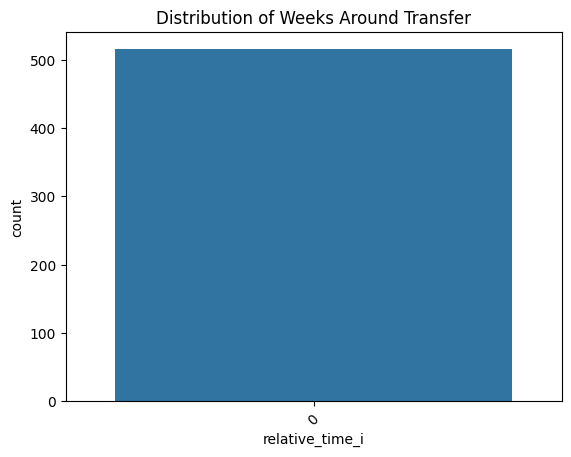

In [21]:
# Distribution of weeks before/after transfer
sns.countplot(data=df_sorted[df_sorted['move_it'] == 1], x='relative_time_i')
plt.title('Distribution of Weeks Around Transfer')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Filter only transfer weeks
transfers = df[df["move_it"] == 1].copy()

# Define the 12-week pre-transfer window
pre_transfer = df[(df["relative_time_i"] < 0) & (df["relative_time_i"] >= -12)]

# Compute pre-transfer performance per employee (weighted delay1)
emp_pre_perf = (
    pre_transfer.groupby("empid")[["delay1", "n_apps"]]
    .apply(lambda x: (x["delay1"] * x["n_apps"]).sum() / x["n_apps"].sum())
    .reset_index(name="emp_pre_delay")
)

# Merge pre-transfer performance into transfers
transfers = transfers.merge(emp_pre_perf, on="empid", how="left")


In [23]:
# Compute average delay1 per office (weighted by n_apps)
office_perf = (
    df.groupby("masked_userid")[["delay1", "n_apps"]]
    .apply(lambda x: (x["delay1"] * x["n_apps"]).sum() / x["n_apps"].sum())
    .reset_index(name="office_avg_delay")
)

# Merge into transfers DataFrame
transfers = transfers.merge(office_perf, on="masked_userid", how="left")


In [24]:
# Determine median performance to split into High/Low
emp_delay_median = transfers["emp_pre_delay"].median()
office_delay_median = transfers["office_avg_delay"].median()

# Categorize
transfers["emp_perf_cat"] = transfers["emp_pre_delay"].apply(
    lambda x: "High" if x <= emp_delay_median else "Low"
)
transfers["office_perf_cat"] = transfers["office_avg_delay"].apply(
    lambda x: "High" if x <= office_delay_median else "Low"
)


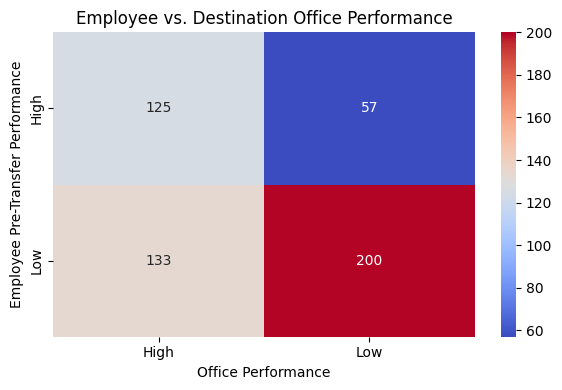

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab: Employee vs Office Performance Category
crosstab = pd.crosstab(transfers["emp_perf_cat"], transfers["office_perf_cat"])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="coolwarm")
plt.title("Employee vs. Destination Office Performance")
plt.xlabel("Office Performance")
plt.ylabel("Employee Pre-Transfer Performance")
plt.tight_layout()
plt.show()


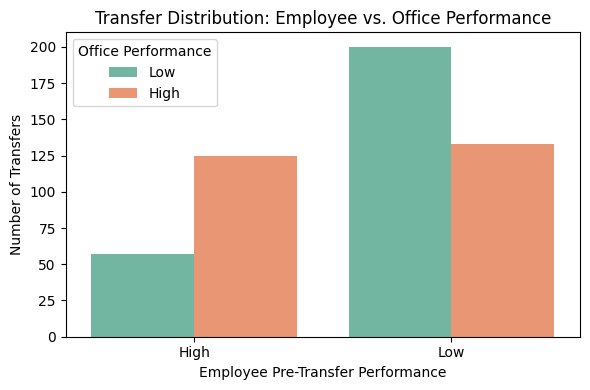

In [26]:
# Bar plot of transfer combinations
plt.figure(figsize=(6, 4))
sns.countplot(data=transfers, x="emp_perf_cat", hue="office_perf_cat", palette="Set2")
plt.title("Transfer Distribution: Employee vs. Office Performance")
plt.xlabel("Employee Pre-Transfer Performance")
plt.ylabel("Number of Transfers")
plt.legend(title="Office Performance")
plt.tight_layout()
plt.show()


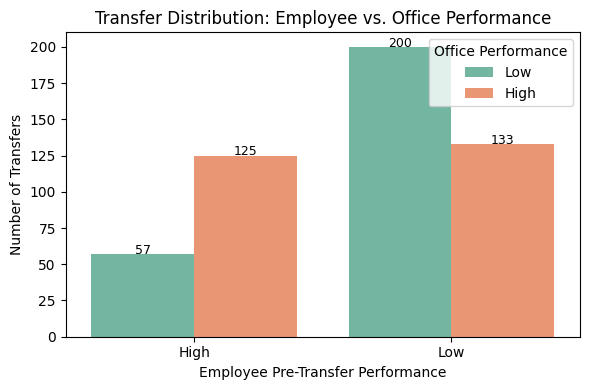

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=transfers, x="emp_perf_cat", hue="office_perf_cat", palette="Set2")

plt.title("Transfer Distribution: Employee vs. Office Performance")
plt.xlabel("Employee Pre-Transfer Performance")
plt.ylabel("Number of Transfers")
plt.legend(title="Office Performance", loc='upper right')

# Add counts above bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center", fontsize=9)

plt.tight_layout()
plt.show()


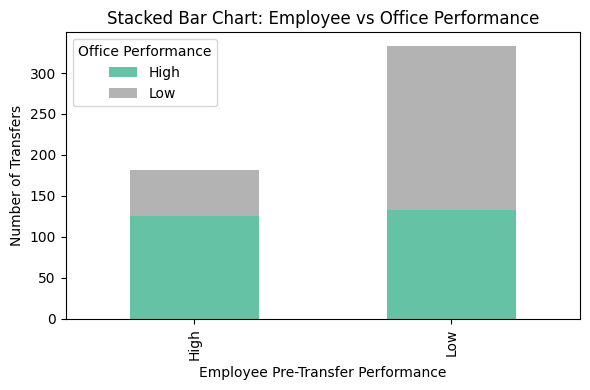

In [28]:
import pandas as pd

# Prepare data
data_counts = transfers.groupby(['emp_perf_cat', 'office_perf_cat']).size().unstack(fill_value=0)

# Plot stacked bar
data_counts.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title('Stacked Bar Chart: Employee vs Office Performance')
plt.xlabel('Employee Pre-Transfer Performance')
plt.ylabel('Number of Transfers')
plt.legend(title='Office Performance')
plt.tight_layout()
plt.show()


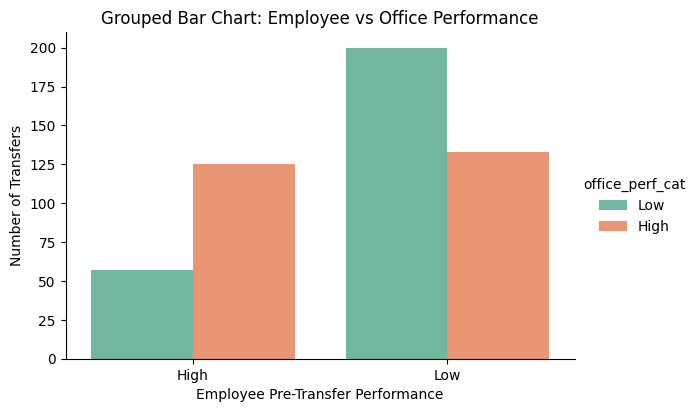

In [29]:
sns.catplot(data=transfers, x='emp_perf_cat', hue='office_perf_cat', kind='count', palette='Set2', height=4, aspect=1.5)
plt.title('Grouped Bar Chart: Employee vs Office Performance')
plt.xlabel('Employee Pre-Transfer Performance')
plt.ylabel('Number of Transfers')
plt.show()


<Figure size 700x500 with 0 Axes>

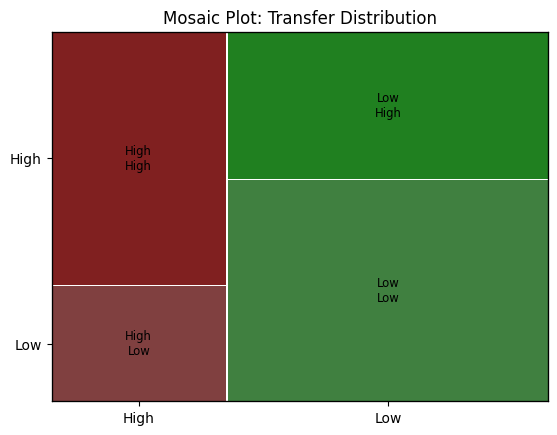

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(7,5))
mosaic(transfers, ['emp_perf_cat', 'office_perf_cat'], title='Mosaic Plot: Transfer Distribution')
plt.show()


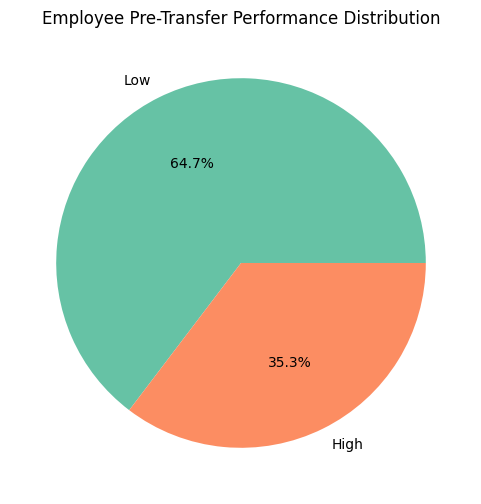

In [31]:
# Pie chart of Employee Performance Category counts
emp_counts = transfers['emp_perf_cat'].value_counts()

plt.figure(figsize=(6,6))
emp_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Employee Pre-Transfer Performance Distribution')
plt.ylabel('')
plt.show()


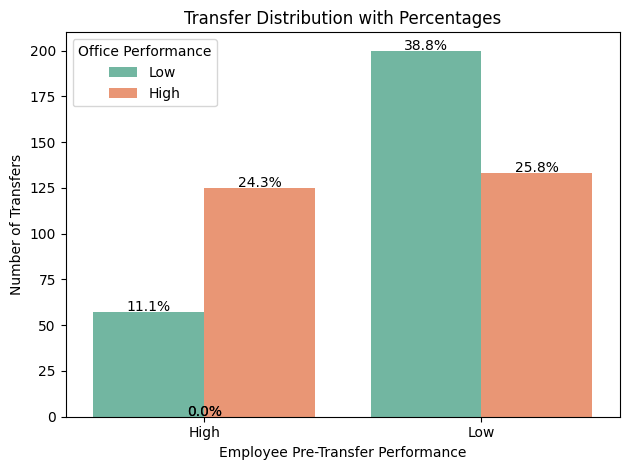

In [32]:
total = len(transfers)
ax = sns.countplot(data=transfers, x='emp_perf_cat', hue='office_perf_cat', palette='Set2')

for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{pct:.1f}%', ha='center')

plt.title('Transfer Distribution with Percentages')
plt.xlabel('Employee Pre-Transfer Performance')
plt.ylabel('Number of Transfers')
plt.legend(title='Office Performance')
plt.tight_layout()
plt.show()


<ipython-input-33-b328c402c26f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=transfers, x='emp_perf_cat', y=numeric_column_to_plot, palette='Set3')


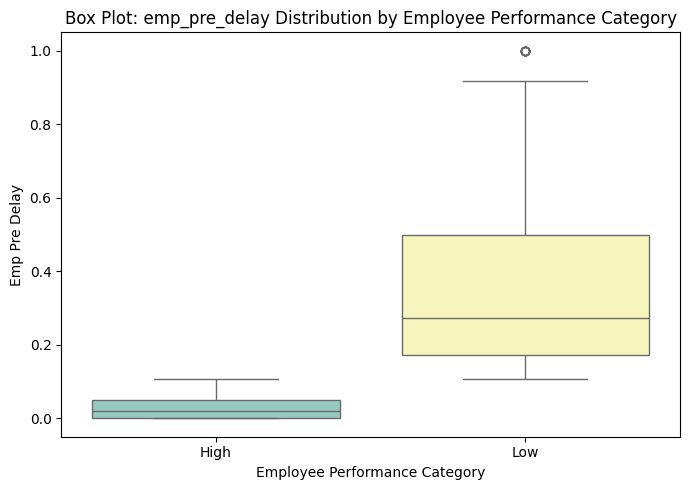

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'transfers' DataFrame is already created as in previous cells

# Example: Plotting 'emp_pre_delay' against 'emp_perf_cat'
# Replace 'emp_pre_delay' with the actual numeric column you want to plot
numeric_column_to_plot = 'emp_pre_delay' # Replace with a valid numeric column name from 'transfers'

# Check if the column exists before plotting
if numeric_column_to_plot in transfers.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=transfers, x='emp_perf_cat', y=numeric_column_to_plot, palette='Set3')
    plt.title(f'Box Plot: {numeric_column_to_plot} Distribution by Employee Performance Category')
    plt.xlabel('Employee Performance Category')
    plt.ylabel(numeric_column_to_plot.replace('_', ' ').title()) # Make label more readable
    plt.tight_layout()
    plt.show()
else:
    print(f"Error: Column '{numeric_column_to_plot}' not found in the 'transfers' DataFrame.")
    print("Available columns:", transfers.columns.tolist())

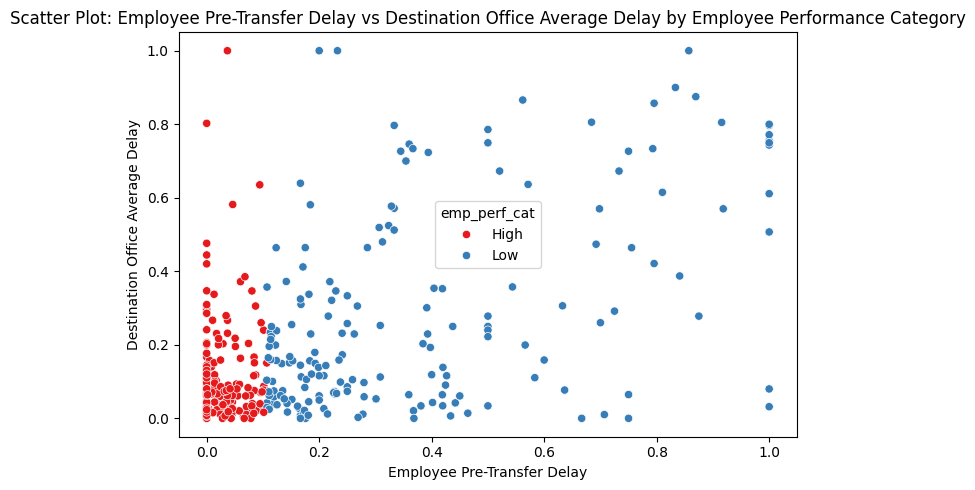

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'transfers' DataFrame is already created as in previous cells

plt.figure(figsize=(7,5))
# Replace 'feature1' and 'feature2' with actual numeric column names from your DataFrame
# Example: Plotting 'emp_pre_delay' against 'office_avg_delay'
sns.scatterplot(data=transfers, x='emp_pre_delay', y='office_avg_delay', hue='emp_perf_cat', palette='Set1')
plt.title('Scatter Plot: Employee Pre-Transfer Delay vs Destination Office Average Delay by Employee Performance Category')
plt.xlabel('Employee Pre-Transfer Delay')
plt.ylabel('Destination Office Average Delay')
plt.tight_layout()
plt.show()

# If you want to plot other features, replace 'emp_pre_delay' and 'office_avg_delay'
# with the names of those columns from your 'transfers' DataFrame.

In [36]:
df.columns

Index(['empid', 'week_date', 'masked_userid', 'move_it', 'relative_time_i',
       'nmoves_i', 'desig_name', 'dept', 'n_services', 'n_apps',
       'process_days_bus', 'delay1', 'district_name'],
      dtype='object')

<ipython-input-37-9fdf04c9eae8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=transfers, x='office_perf_cat', y='emp_pre_delay', palette='Pastel1')


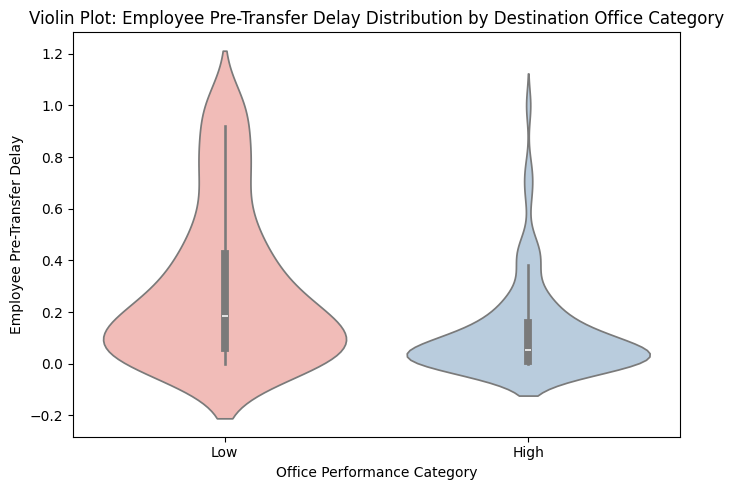

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
# Replace 'some_numeric_feature' with an actual numeric column name from your DataFrame
# For example, if you want to plot the distribution of pre-transfer employee delay:
sns.violinplot(data=transfers, x='office_perf_cat', y='emp_pre_delay', palette='Pastel1')
# Or if you want to plot the distribution of the average delay of the destination office:
# sns.violinplot(data=transfers, x='office_perf_cat', y='office_avg_delay', palette='Pastel1')
plt.title('Violin Plot: Employee Pre-Transfer Delay Distribution by Destination Office Category')
plt.xlabel('Office Performance Category')
plt.ylabel('Employee Pre-Transfer Delay') # Update the y-axis label accordingly
plt.tight_layout()
plt.show()

In [38]:
transfers['week_date'] = pd.to_datetime(transfers['week_date'], errors='coerce')


<ipython-input-38-0d966ee61e3c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transfers['week_date'] = pd.to_datetime(transfers['week_date'], errors='coerce')


In [39]:
# Check missing values
print(transfers.isnull().sum())

# For simplicity, fill missing numeric values with median
numeric_cols = ['relative_time_i', 'nmoves_i', 'n_services', 'n_apps', 'process_days_bus', 'delay1']

for col in numeric_cols:
    transfers[col].fillna(transfers[col].median(), inplace=True)

# For categorical columns, fill with mode or 'Unknown'
cat_cols = ['desig_name', 'dept', 'district_name']

for col in cat_cols:
    transfers[col].fillna('Unknown', inplace=True)


empid                 0
week_date           515
masked_userid         0
move_it               0
relative_time_i       0
nmoves_i              0
desig_name            0
dept                  0
n_services            0
n_apps                0
process_days_bus      0
delay1                0
district_name        63
emp_pre_delay       151
office_avg_delay      0
emp_perf_cat          0
office_perf_cat       0
dtype: int64


<ipython-input-39-cd264d075e7c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transfers[col].fillna(transfers[col].median(), inplace=True)
<ipython-input-39-cd264d075e7c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [40]:
# Label Encoding example for 'desig_name' and 'dept'
from sklearn.preprocessing import LabelEncoder

for col in ['desig_name', 'dept', 'district_name']:
    le = LabelEncoder()
    transfers[col] = le.fit_transform(transfers[col])


<ipython-input-41-792a86cd6a5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=transfers, x='dept', y='nmoves_i', palette='Set2')


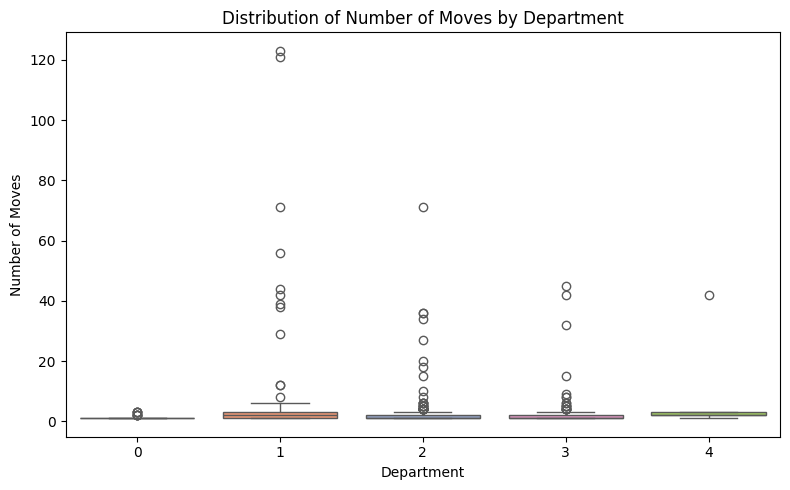

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=transfers, x='dept', y='nmoves_i', palette='Set2')
plt.title('Distribution of Number of Moves by Department')
plt.xlabel('Department')
plt.ylabel('Number of Moves')
plt.tight_layout()
plt.show()


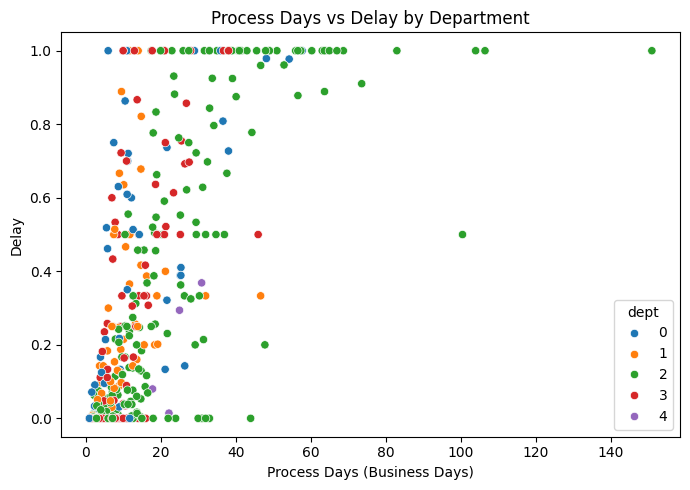

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=transfers, x='process_days_bus', y='delay1', hue='dept', palette='tab10')
plt.title('Process Days vs Delay by Department')
plt.xlabel('Process Days (Business Days)')
plt.ylabel('Delay')
plt.tight_layout()
plt.show()


<ipython-input-44-1cfee6f64771>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transfers.groupby('desig_name')['move_it'].sum().reset_index(), x='desig_name', y='move_it', palette='coolwarm')


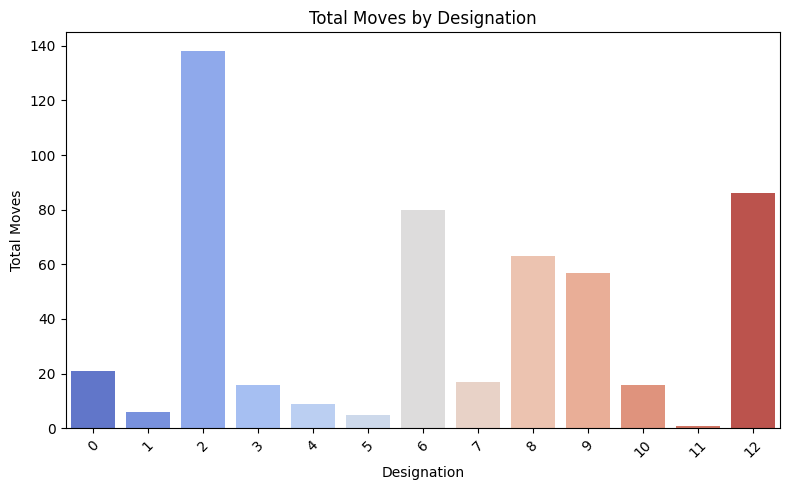

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(data=transfers.groupby('desig_name')['move_it'].sum().reset_index(), x='desig_name', y='move_it', palette='coolwarm')
plt.title('Total Moves by Designation')
plt.xlabel('Designation')
plt.ylabel('Total Moves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


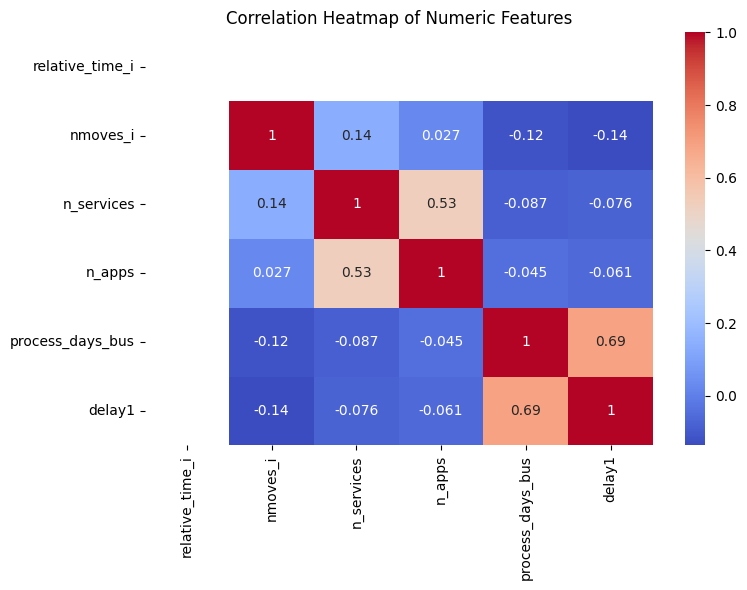

In [45]:
plt.figure(figsize=(8,6))
corr = transfers[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


<ipython-input-46-e0c4048e685f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


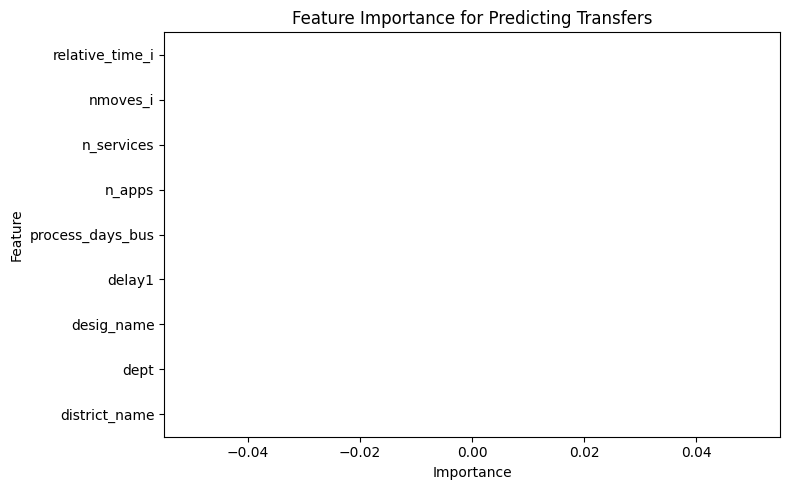

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = transfers[numeric_cols + ['desig_name', 'dept', 'district_name']]
y = transfers['move_it']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance for Predicting Transfers')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming transfers dataframe is loaded and cleaned as before

# Encode categorical variables
cat_cols = ['desig_name', 'dept', 'district_name']
for col in cat_cols:
    le = LabelEncoder()
    transfers[col] = le.fit_transform(transfers[col])

# Features and target
numeric_cols = ['relative_time_i', 'nmoves_i', 'n_services', 'n_apps', 'process_days_bus', 'delay1']
X = transfers[numeric_cols + cat_cols]
y = transfers['move_it']

# Scale numeric features (helps some models)
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<ipython-input-47-a7069cac3038>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [52]:
print("Original y distribution:\n", y.value_counts(normalize=True))
print("Train y distribution:\n", y_train.value_counts(normalize=True))
print("Test y distribution:\n", y_test.value_counts(normalize=True))


Original y distribution:
 move_it
1    1.0
Name: proportion, dtype: float64
Train y distribution:
 move_it
1    1.0
Name: proportion, dtype: float64
Test y distribution:
 move_it
1    1.0
Name: proportion, dtype: float64


In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train target distribution:")
print(y_train.value_counts())

# If y_train has only one class, try increasing test_size or sample more data
# Or do SMOTE only on training set

if len(y_train.unique()) == 1:
    print("Training set has only one class. Trying different split or data required.")
else:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    print("After SMOTE, training distribution:")
    print(pd.Series(y_train_res).value_counts())

    # Now fit model
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train_res, y_train_res)


move_it
1    515
Name: count, dtype: int64
Train target distribution:
move_it
1    360
Name: count, dtype: int64
Training set has only one class. Trying different split or data required.


In [58]:


X_train_scaled.loc[:, numeric_cols] = scaler.fit_transform(X_train[numeric_cols].astype(float))
X_test_scaled.loc[:, numeric_cols] = scaler.transform(X_test[numeric_cols].astype(float))


In [59]:
# prompt: apply all models part by part  ty to give s uchs commentsin between thecode

# Assuming the necessary libraries are already imported and data loaded and preprocessed as in the preceding code.
# The 'transfers' DataFrame is assumed to be the final processed data.

# Step 1: Select Features and Target
# Define the features (X) and the target variable (y).
# We'll use numeric and encoded categorical features.
X = transfers[numeric_cols + cat_cols]
y = transfers['move_it']

# Step 2: Split Data into Training and Testing Sets
# Split the data into training and testing sets. Stratify to maintain class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print the distribution of the target variable in train and test sets
print("\nTrain target distribution after split:")
print(y_train.value_counts(normalize=True))
print("\nTest target distribution after split:")
print(y_test.value_counts(normalize=True))


# Step 3: Check for Class Imbalance in the Training Set
# Check if the training set has more than one unique class before applying SMOTE.
if len(y_train.unique()) == 1:
    print("\nTraining set has only one class. Cannot apply SMOTE. Investigate data or split.")
else:
    # Step 4: Apply SMOTE to Training Data (for imbalanced classification)
    # Use SMOTE to oversample the minority class in the training data.
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Print the distribution after applying SMOTE
    print("\nAfter SMOTE, training target distribution:")
    print(pd.Series(y_train_res).value_counts())

    # Step 5: Scale Numeric Features using StandardScaler
    # Scale the numeric features. Fit on the resampled training data and transform both.
    # It's generally better to scale *after* splitting and *before* fitting the model.
    # We will apply scaling to the resampled training data and the test data.

    # Ensure X_train_res and X_test are DataFrames to preserve column names
    X_train_res = pd.DataFrame(X_train_res, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)

    scaler = StandardScaler()

    # Fit on resampled training data and transform
    X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])

    # Transform test data
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    print("\nNumeric features scaled in training and test sets.")


    # Step 6: Train a Logistic Regression Model
    # Initialize and train a Logistic Regression model on the resampled and scaled training data.
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train_res, y_train_res)

    print("\nLogistic Regression model trained.")

    # Step 7: Evaluate the Model (Example using accuracy)
    # Make predictions on the scaled test set.
    y_pred = lr.predict(X_test)

    # Calculate and print accuracy. More detailed metrics (precision, recall, f1-score)
    # are often more appropriate for imbalanced datasets.
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Step 8: Train a RandomForestClassifier Model
    # Initialize and train a RandomForestClassifier model. Can also be trained on resampled data.
    # Let's train it on the resampled and scaled data for consistency with LR example.
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_res, y_train_res)

    print("\nRandom Forest model trained.")

    # Step 9: Evaluate the Random Forest Model
    # Make predictions on the scaled test set.
    y_pred_rf = rf.predict(X_test)

    # Evaluate the Random Forest model
    print("\nRandom Forest Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_rf))

    # Step 10: Feature Importance from Random Forest
    # Get and plot feature importance from the trained Random Forest model.
    importances_rf = rf.feature_importances_
    features_rf = X.columns

    # Sort features by importance
    indices = np.argsort(importances_rf)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances_rf[indices], y=features_rf[indices], palette='viridis')
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


    # Step 11: Example of another model - Gradient Boosting (e.g., LightGBM or XGBoost)
    # Install LightGBM if not already installed
    !pip install lightgbm

    import lightgbm as lgb

    # Initialize and train a LightGBM model
    lgb_clf = lgb.LGBMClassifier(random_state=42)
    lgb_clf.fit(X_train_res, y_train_res)

    print("\nLightGBM model trained.")

    # Step 12: Evaluate the LightGBM Model
    # Make predictions on the scaled test set.
    y_pred_lgb = lgb_clf.predict(X_test)

    # Evaluate the LightGBM model
    print("\nLightGBM Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lgb))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_lgb))

    # Step 13: Feature Importance from LightGBM (if available)
    # LightGBM also provides feature importance
    importances_lgb = lgb_clf.feature_importances_
    features_lgb = X.columns

    # Sort features by importance
    indices_lgb = np.argsort(importances_lgb)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances_lgb[indices_lgb], y=features_lgb[indices_lgb], palette='magma')
    plt.title('Feature Importance from LightGBM')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Note: The code includes training Logistic Regression, RandomForest, and LightGBM models
# as examples based on the provided libraries. Other models could be added similarly.
# Model evaluation is done using basic metrics, and further hyperparameter tuning
# and cross-validation would be needed for a robust solution.



Train target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Test target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Training set has only one class. Cannot apply SMOTE. Investigate data or split.


In [60]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example: Replace with your actual data
# X = ... (features)
# y = ... (target)

print("Target class distribution:\n", y.value_counts())

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

# Scale numeric features
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled.loc[:, numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled.loc[:, numeric_cols] = scaler.transform(X_test[numeric_cols])


Target class distribution:
 move_it
1    515
Name: count, dtype: int64
Train target distribution:
move_it
1    360
Name: count, dtype: int64
Test target distribution:
move_it
1    155
Name: count, dtype: int64


<ipython-input-60-3859f758fa86>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.06818974 -0.24167601 -0.24167601 -0.24167601 -0.24167601 -0.24167601
 -0.24167601 -0.24167601 -0.06818974  3.48827869  0.19203966 -0.24167601
 -0.24167601 -0.24167601 -0.24167601 -0.24167601 -0.24167601 -0.24167601
 -0.24167601  0.01855339 -0.15493287 -0.24167601 -0.24167601  0.10529652
 -0.15493287 -0.24167601  1.23295725 10.34098616 -0.15493287 10.1674999
 -0.15493287 -0.15493287 -0.24167601 -0.24167601  5.83034327 -0.15493287
  0.01855339 -0.24167601 -0.15493287 -0.24167601 -0.24167601 -0.24167601
 -0.15493287 -0.15493287  0.01855339 -0.24167601 -0.24167601  0.71249845
 -0.06818974  0.36552592 -0.24167601 -0.15493287 -0.24167601 -0.15493287
 -0.15493287 -0.15493287 -0.24167601 -0.15493287 -0.24167601  0.01855339
 -0.15493287 -0.24167601 -0.24167601  3.31479243 -0.24167601 -0.24167601
  0.19203966 -0.24167601  0.10529652 -0.1549

In [62]:
from sklearn.tree import DecisionTreeClassifier

print("=== Decision Tree ===")

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Decision Tree ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

Confusion Matrix:
 [[155]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [63]:
from sklearn.ensemble import RandomForestClassifier

print("=== Random Forest ===")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Random Forest ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

Confusion Matrix:
 [[155]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [65]:
from sklearn.neighbors import KNeighborsClassifier

print("=== K-Nearest Neighbors ===")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== K-Nearest Neighbors ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

Confusion Matrix:
 [[155]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [66]:
from sklearn.naive_bayes import GaussianNB

print("=== Naive Bayes ===")

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Naive Bayes ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

Confusion Matrix:
 [[155]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [67]:
from sklearn.neural_network import MLPClassifier

print("=== Neural Network (MLP) ===")

mlp = MLPClassifier(max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Neural Network (MLP) ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

Confusion Matrix:
 [[155]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [68]:
print("Unique classes in y:", y.unique())
print("Class counts in y:\n", y.value_counts())


Unique classes in y: [1]
Class counts in y:
 move_it
1    515
Name: count, dtype: int64


In [73]:
df.describe()

,empid,masked_userid,move_it,relative_time_i,nmoves_i,n_services,n_apps,process_days_bus,delay1
count,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000
mean,42009.384999,552.683094,0.024713,-2.427132,2.917750,4.677576,73.069629,10.888572,0.172616
std,44961.225946,329.115390,0.155254,30.977879,8.330839,3.161023,123.342395,15.070957,0.262880
min,95.000000,2.000000,0.000000,-103.000000,1.000000,1.000000,1.000000,1.000000,0.000100
25%,6609.000000,260.000000,0.000000,-21.000000,1.000000,1.000000,7.000000,3.208333,0.000100
50%,19021.000000,532.000000,0.000000,-1.000000,1.000000,5.000000,28.000000,6.377049,0.048780
75%,104747.000000,829.000000,0.000000,16.000000,2.000000,7.000000,80.000000,12.691540,0.219717
max,150801.000000,1126.000000,1.000000,100.000000,132.000000,19.000000,1557.000000,372.000000,1.000000


In [74]:
print("Class distribution in target (move_it):")
print(y.value_counts(normalize=True))


Class distribution in target (move_it):
move_it
1    1.0
Name: proportion, dtype: float64


In [75]:
from sklearn.model_selection import train_test_split

X = df.drop('move_it', axis=1)
y = df['move_it']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train class distribution:
 move_it
0    0.97532
1    0.02468
Name: proportion, dtype: float64
Test class distribution:
 move_it
0    0.975208
1    0.024792
Name: proportion, dtype: float64


<ipython-input-78-fffe4aaa7cb9>:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if transfers[col].dtype == 'object' or pd.api.types.is_categorical_dtype(transfers[col]):



Train target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Test target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Numeric features scaled in training and test sets.

Training set has only one class. Cannot apply SMOTE. Investigate data or split.

--- Training and Evaluating Logistic Regression ---
An error occurred while training/evaluating Logistic Regression: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

--- Training and Evaluating Random Forest ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
<ipython-input-78-fffe4aaa7cb9>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for 

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155


Confusion Matrix:
[[155]]

--- Training and Evaluating Gradient Boosting ---
An error occurred while training/evaluating Gradient Boosting: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

--- Training and Evaluating Decision Tree ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155


Confusion Matrix:
[[155]]

--- Training and Evaluating LightGBM --

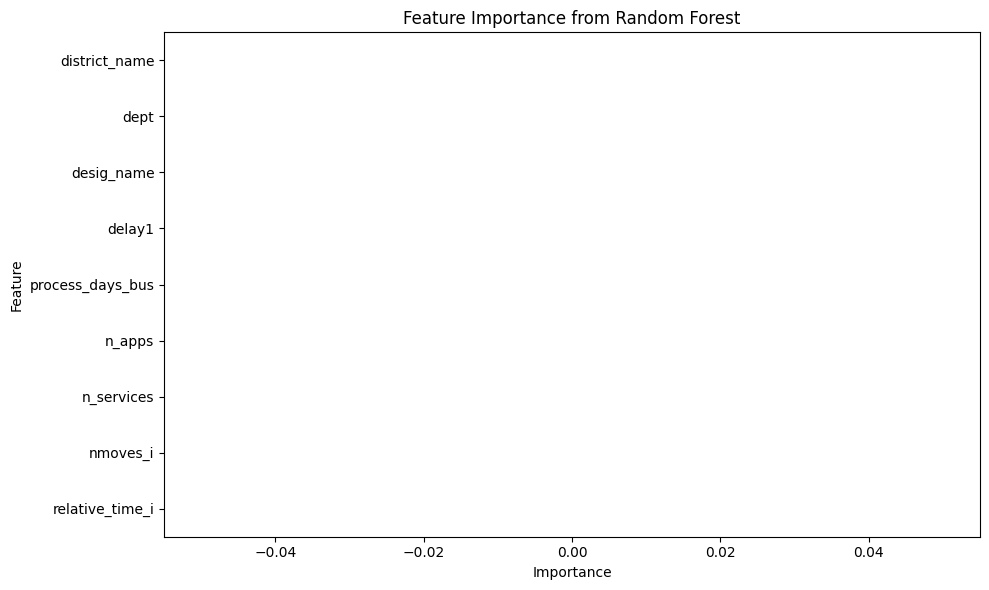

<ipython-input-78-fffe4aaa7cb9>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


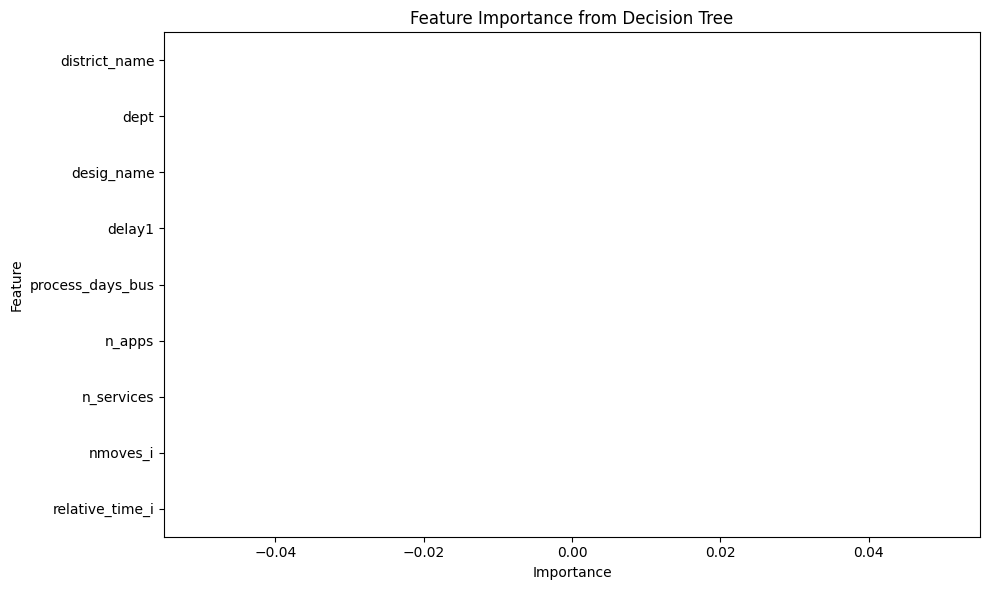

<ipython-input-78-fffe4aaa7cb9>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


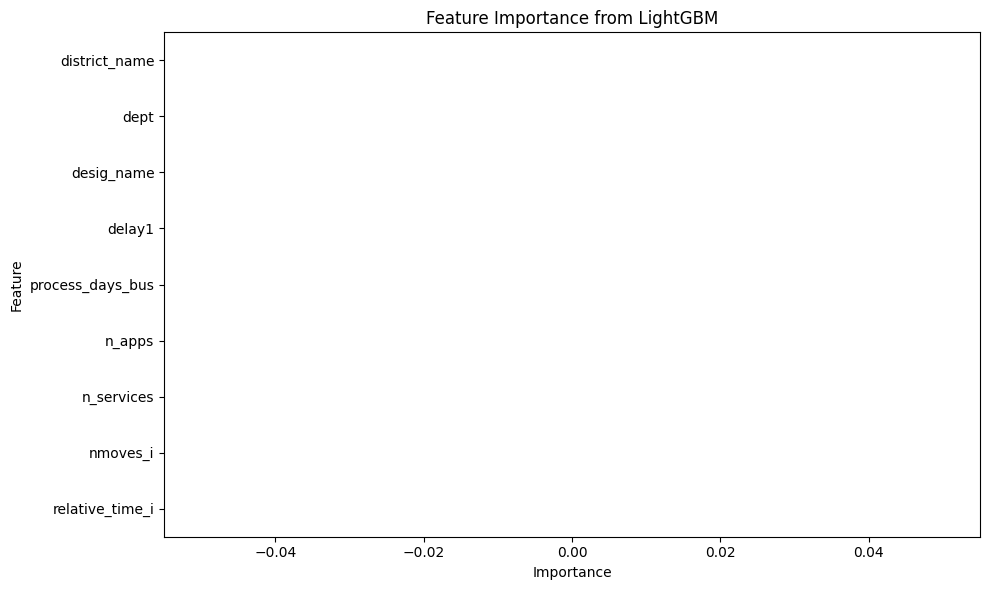

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Assuming the 'transfers' DataFrame is already created and cleaned as before.
# Make sure the 'transfers' DataFrame contains the necessary columns:
# 'move_it' (target), numeric_cols, and cat_cols

# Define the feature and target columns again for clarity
numeric_cols = ['relative_time_i', 'nmoves_i', 'n_services', 'n_apps', 'process_days_bus', 'delay1']
cat_cols = ['desig_name', 'dept', 'district_name'] # Make sure these are encoded if not already

# Ensure categorical columns are encoded if not already done in previous cells
# Re-run the encoding step here just in case
for col in cat_cols:
    if transfers[col].dtype == 'object' or pd.api.types.is_categorical_dtype(transfers[col]):
         le = LabelEncoder()
         transfers[col] = le.fit_transform(transfers[col])


# Step 1: Select Features and Target
# Define the features (X) and the target variable (y).
X = transfers[numeric_cols + cat_cols].copy() # Use .copy() to avoid SettingWithCopyWarning
y = transfers['move_it']

# Step 2: Split Data into Training and Testing Sets
# Split the data into training and testing sets. Stratify to maintain class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print the distribution of the target variable in train and test sets
print("\nTrain target distribution after split:")
print(y_train.value_counts(normalize=True))
print("\nTest target distribution after split:")
print(y_test.value_counts(normalize=True))

# Step 3: Scale Numeric Features using StandardScaler
# Scale the numeric features. Fit on the training data and transform both.
scaler = StandardScaler()

# Create copies to store scaled data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nNumeric features scaled in training and test sets.")


# Step 4: Apply SMOTE to Training Data (for imbalanced classification)
# Use SMOTE to oversample the minority class in the scaled training data.
# Check if the training set has more than one unique class before applying SMOTE.
if len(y_train.unique()) == 1:
    print("\nTraining set has only one class. Cannot apply SMOTE. Investigate data or split.")
    # If SMOTE cannot be applied, train models on X_train_scaled, y_train
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train
else:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Print the distribution after applying SMOTE
    print("\nAfter SMOTE, training target distribution:")
    print(pd.Series(y_train_resampled).value_counts())


# Step 5: Initialize and Train Models
# Assuming X_train_resampled, y_train_resampled, X_test_scaled, y_test are ready

# Initialize models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), # Increased max_iter
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # SVC can be slow on larger datasets; removed for faster execution if needed
    # 'Support Vector Machine': SVC(random_state=42, class_weight='balanced', probability=True), # probability=True if needed for predict_proba
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'LightGBM': lgb.LGBMClassifier(random_state=42) # Add LightGBM
}

accuracies = {}
classification_reports = {}
confusion_matrices = {}
feature_importances = {} # To store feature importances for tree-based models

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    try:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracies[name] = acc
        classification_reports[name] = classification_report(y_test, y_pred)
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)

        print(f"Accuracy: {acc:.4f}")
        print("\nClassification Report:")
        print(classification_reports[name])
        print("\nConfusion Matrix:")
        print(confusion_matrices[name])

        # Store feature importance if the model provides it
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_
        elif hasattr(model, 'coef_'): # For linear models like Logistic Regression
             # For binary classification, coef_ is (1, n_features) or (n_features,)
             # Take the absolute value as importance
             feature_importances[name] = np.abs(model.coef_)[0] if model.coef_.ndim > 1 else np.abs(model.coef_)


    except Exception as e:
        print(f"An error occurred while training/evaluating {name}: {e}")


# Optional: Plot Feature Importances for models that provide it
for name, importances in feature_importances.items():
    features = X.columns
    # Sort features by importance
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
    plt.title(f'Feature Importance from {name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

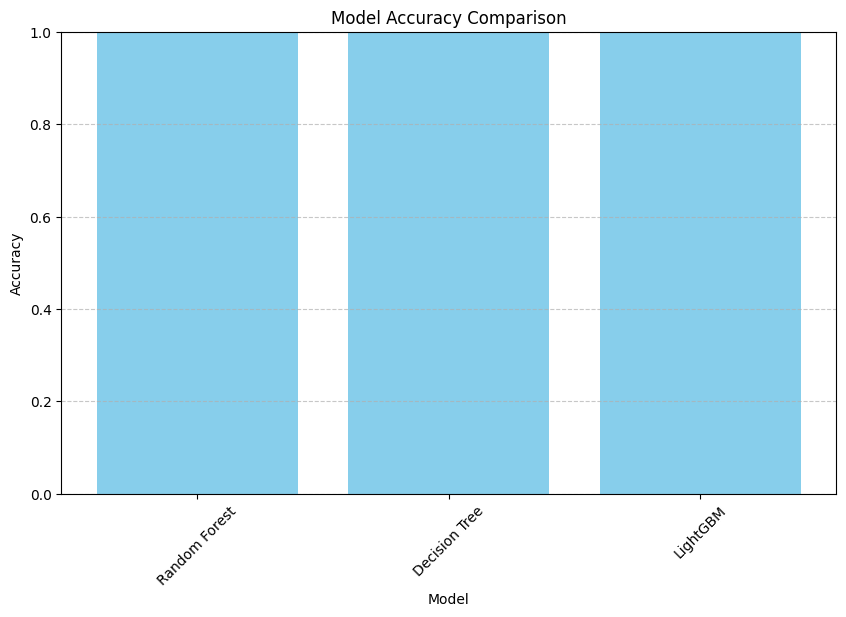

In [79]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-88-6ada7943ef5f>:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if transfers[col].dtype == 'object' or pd.api.types.is_categorical_dtype(transfers[col]):



Train target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Test target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Numeric features scaled in training and test sets.

Training set has only one class. Cannot apply SMOTE. Investigate data or split.

--- Training and Evaluating Logistic Regression ---
An error occurred while training/evaluating Logistic Regression: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

--- Training and Evaluating Random Forest ---
Random Forest model fitted.
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155


Confusion Matrix:
[[155]]

--- Training and Evaluating Gradient Boost

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

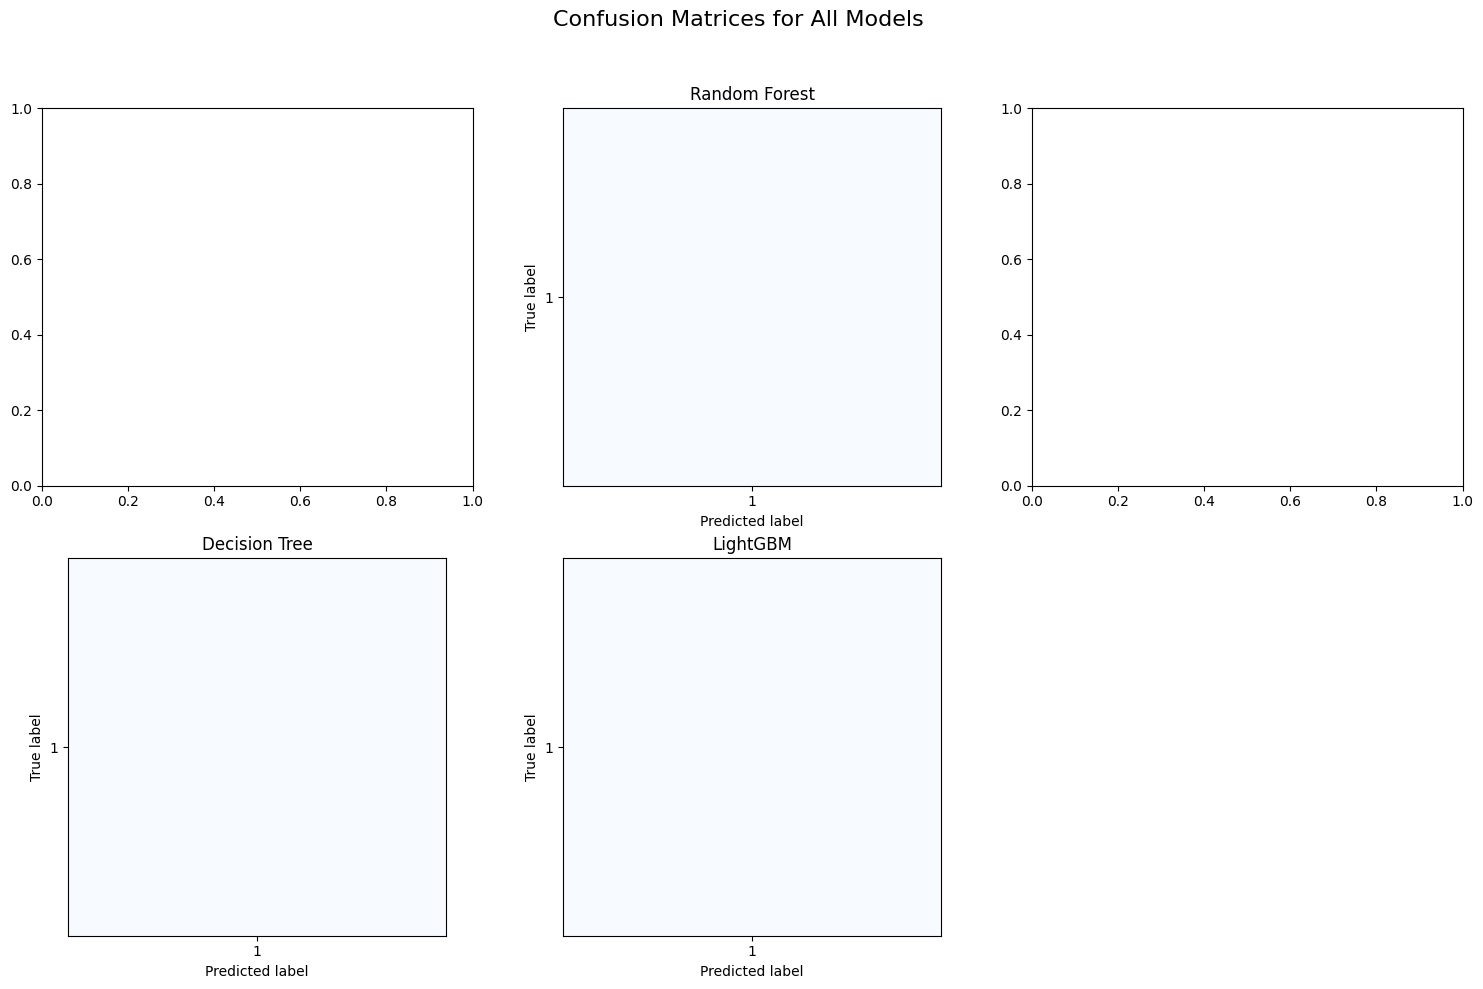

<ipython-input-88-6ada7943ef5f>:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


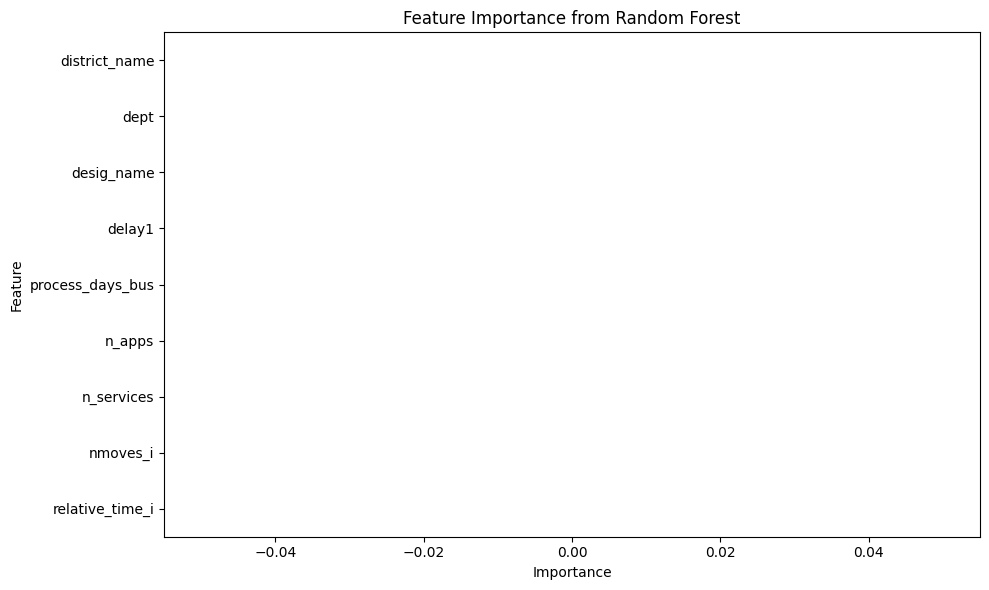

<ipython-input-88-6ada7943ef5f>:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


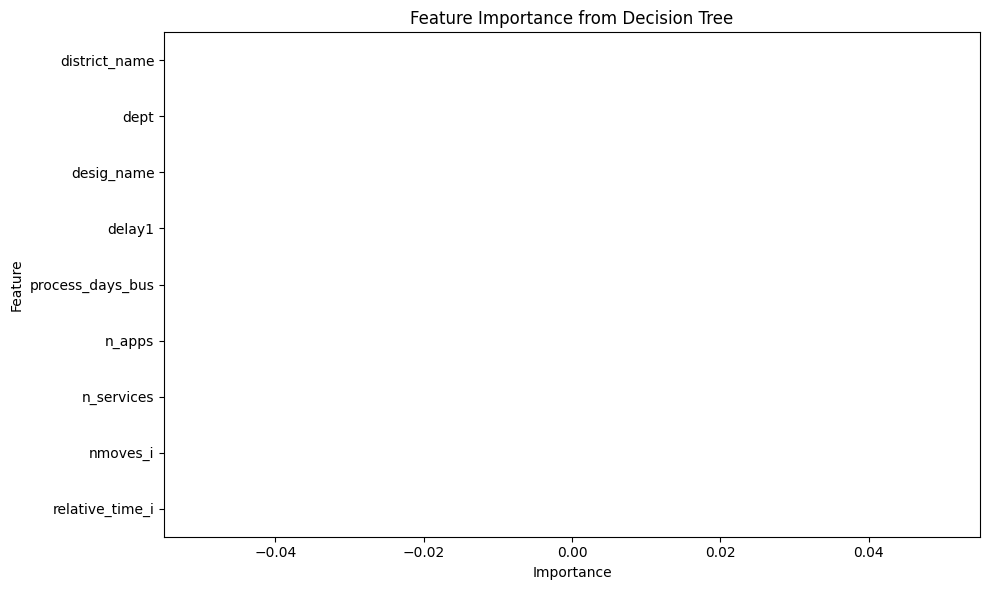

<ipython-input-88-6ada7943ef5f>:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


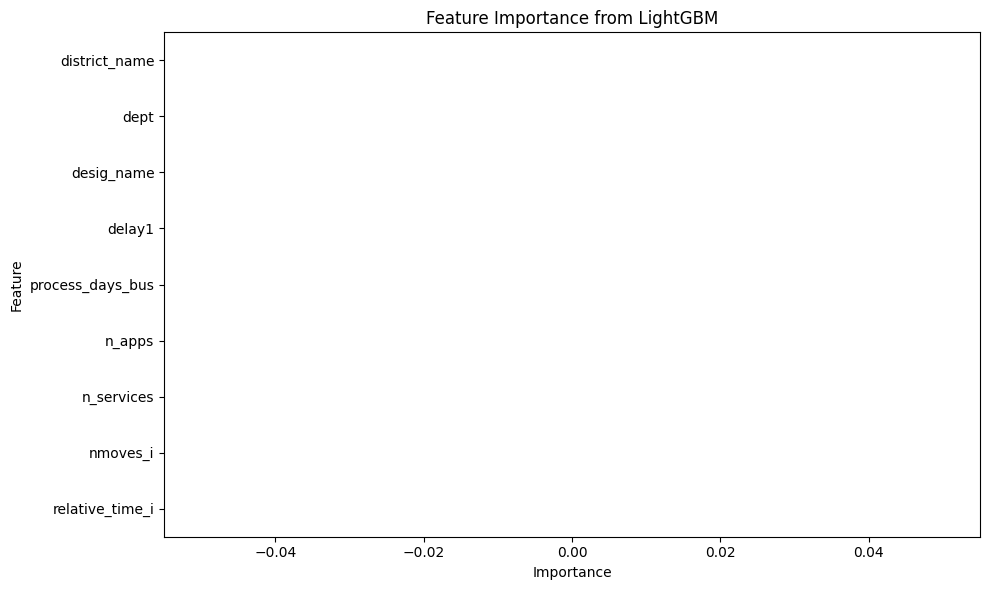

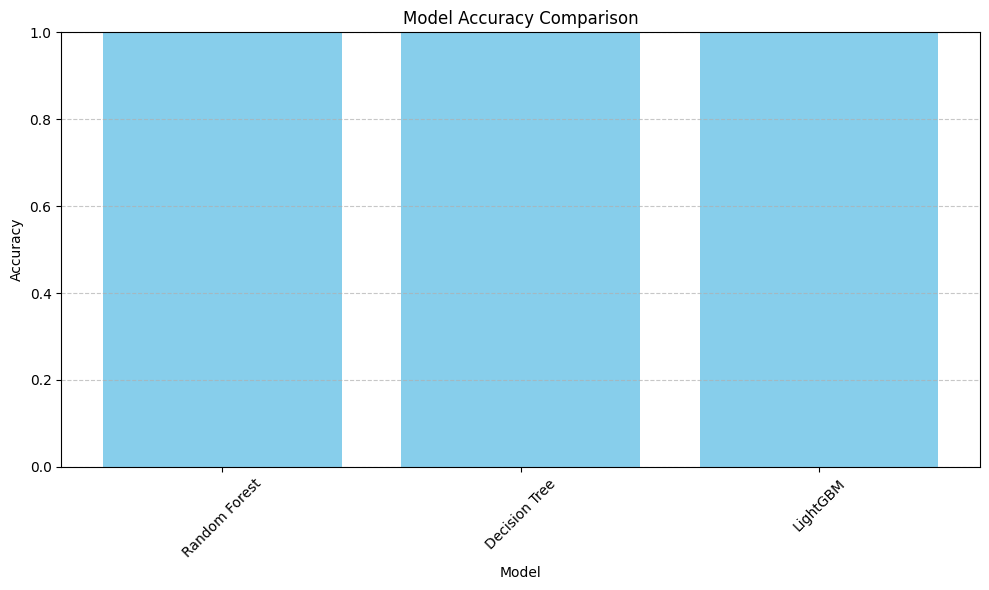

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb # Make sure lightgbm is installed: !pip install lightgbm

# Assuming the 'transfers' DataFrame is already created and cleaned as before.
# Make sure the 'transfers' DataFrame contains the necessary columns:
# 'move_it' (target), numeric_cols, and cat_cols

# Define the feature and target columns again for clarity
numeric_cols = ['relative_time_i', 'nmoves_i', 'n_services', 'n_apps', 'process_days_bus', 'delay1']
cat_cols = ['desig_name', 'dept', 'district_name'] # Make sure these are encoded if not already

# Ensure categorical columns are encoded if not already done in previous cells
# Re-run the encoding step here just in case
for col in cat_cols:
    if transfers[col].dtype == 'object' or pd.api.types.is_categorical_dtype(transfers[col]):
         le = LabelEncoder()
         transfers[col] = le.fit_transform(transfers[col])


# Step 1: Select Features and Target
# Define the features (X) and the target variable (y).
X = transfers[numeric_cols + cat_cols].copy() # Use .copy() to avoid SettingWithCopyWarning
y = transfers['move_it']

# Step 2: Split Data into Training and Testing Sets
# Split the data into training and testing sets. Stratify to maintain class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print the distribution of the target variable in train and test sets
print("\nTrain target distribution after split:")
print(y_train.value_counts(normalize=True))
print("\nTest target distribution after split:")
print(y_test.value_counts(normalize=True))

# Step 3: Scale Numeric Features using StandardScaler
# Scale the numeric features. Fit on the training data and transform both.
scaler = StandardScaler()

# Create copies to store scaled data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nNumeric features scaled in training and test sets.")


# Step 4: Apply SMOTE to Training Data (for imbalanced classification)
# Use SMOTE to oversample the minority class in the scaled training data.
# Check if the training set has more than one unique class before applying SMOTE.
if len(y_train.unique()) == 1:
    print("\nTraining set has only one class. Cannot apply SMOTE. Investigate data or split.")
    # If SMOTE cannot be applied, train models on X_train_scaled, y_train
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train
else:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Print the distribution after applying SMOTE
    print("\nAfter SMOTE, training target distribution:")
    print(pd.Series(y_train_resampled).value_counts())


# Step 5: Initialize and Train Models, then Evaluate and Plot
# Assuming X_train_resampled, y_train_resampled, X_test_scaled, y_test are ready

# Initialize models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # 'Support Vector Machine': SVC(random_state=42, class_weight='balanced', probability=True), # SVC can be slow
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

accuracies = {}
classification_reports = {}
confusion_matrices = {}
feature_importances = {} # To store feature importances for tree-based models

# Set up subplots for confusion matrices — Adjust layout based on number of models
n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols # Calculate needed rows

fig_cm, axes_cm = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
# Flatten axes array for easy iteration, handle case with only one subplot
if n_models > 1:
    axes_cm = axes_cm.flatten()
else:
    axes_cm = [axes_cm] # Make it iterable even if it's a single Axes object


for i, (name, model) in enumerate(models.items()):
    print(f"\n--- Training and Evaluating {name} ---")
    try:
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        print(f"{name} model fitted.")

        # Predict on test data
        y_pred = model.predict(X_test_scaled)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        accuracies[name] = acc
        classification_reports[name] = classification_report(y_test, y_pred)
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)

        print(f"Accuracy: {acc:.4f}")
        print("\nClassification Report:")
        print(classification_reports[name])
        print("\nConfusion Matrix:")
        print(confusion_matrices[name])

        # Plot Confusion Matrix for the current model
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=axes_cm[i], cmap='Blues', colorbar=False)
        axes_cm[i].set_title(f'{name}')


        # Store feature importance if the model provides it
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_
        elif hasattr(model, 'coef_'): # For linear models like Logistic Regression
             # For binary classification, coef_ is (1, n_features) or (n_features,)
             # Take the absolute value as importance
             # Ensure coef_ has the expected shape for binary classification
            if hasattr(model, 'classes_') and len(model.classes_) == 2:
                feature_importances[name] = np.abs(model.coef_)[0] if model.coef_.ndim > 1 else np.abs(model.coef_)
            else:
                 print(f"Skipping feature importance for {name}: coef_ shape not as expected for binary classification.")


    except Exception as e:
        print(f"An error occurred while training/evaluating {name}: {e}")

# Hide any unused subplots
for j in range(i + 1, len(axes_cm)):
    fig_cm.delaxes(axes_cm[j])

plt.suptitle('Confusion Matrices for All Models', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()


# Optional: Plot Feature Importances for models that provide it
# Iterate through stored feature importances and plot
for name, importances in feature_importances.items():
    features = X.columns
    # Ensure number of importances matches number of features
    if len(importances) == len(features):
        # Sort features by importance
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
        plt.title(f'Feature Importance from {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping feature importance plot for {name}: Mismatch between number of features and importances.")


# Plot accuracies comparison (can be done after the loop)
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout
plt.show()

<ipython-input-91-3667d8d1d822>:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if transfers[col].dtype == 'object' or pd.api.types.is_categorical_dtype(transfers[col]):



Train target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Test target distribution after split:
move_it
1    1.0
Name: proportion, dtype: float64

Numeric features scaled in training and test sets.

Training set has only one class. Cannot apply SMOTE. Investigate data or split.

--- Training and Evaluating Logistic Regression ---
An error occurred while training/evaluating Logistic Regression: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)
Skipping Logistic Regression in further evaluation steps.

--- Training and Evaluating Random Forest ---
Random Forest model fitted successfully.
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       155

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

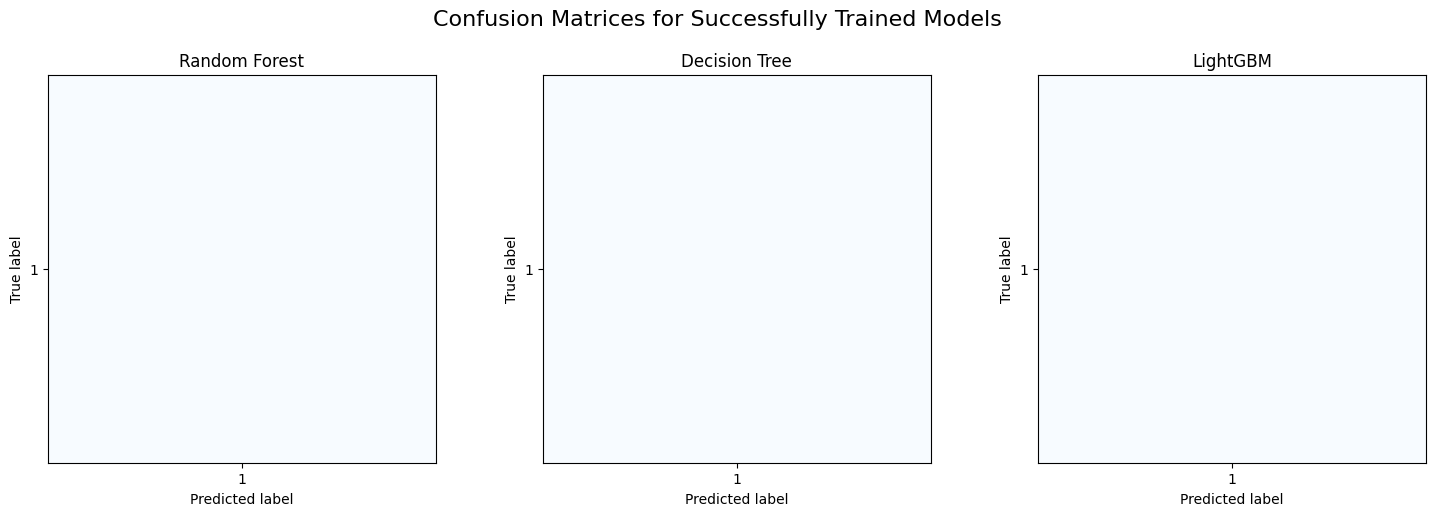

<ipython-input-91-3667d8d1d822>:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


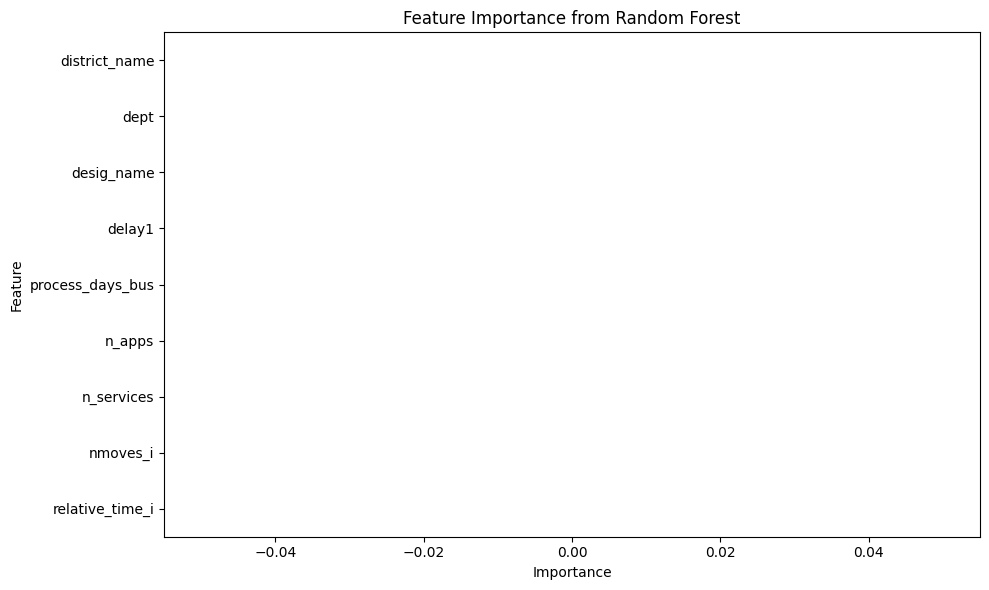

<ipython-input-91-3667d8d1d822>:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


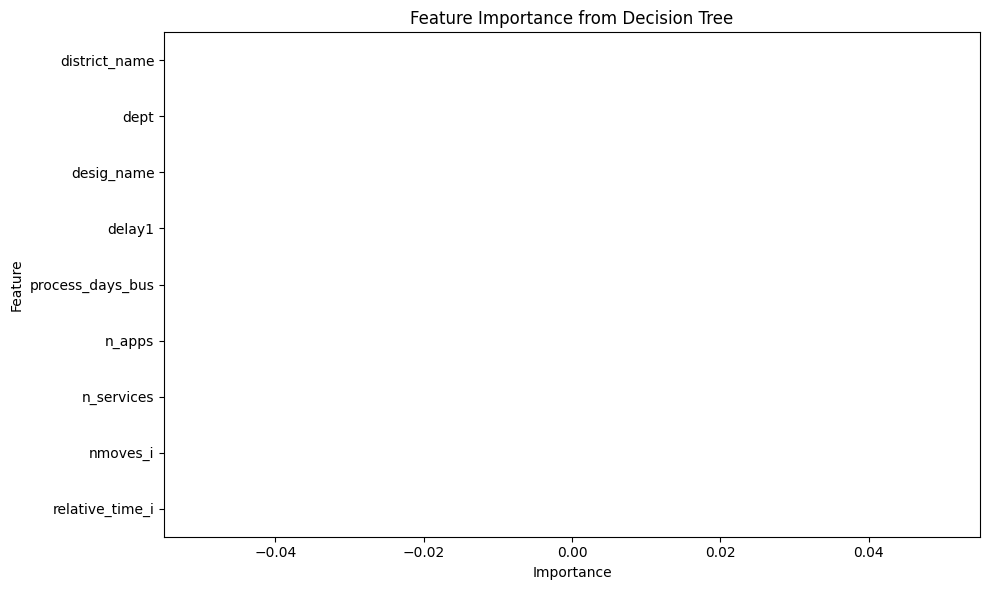

<ipython-input-91-3667d8d1d822>:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


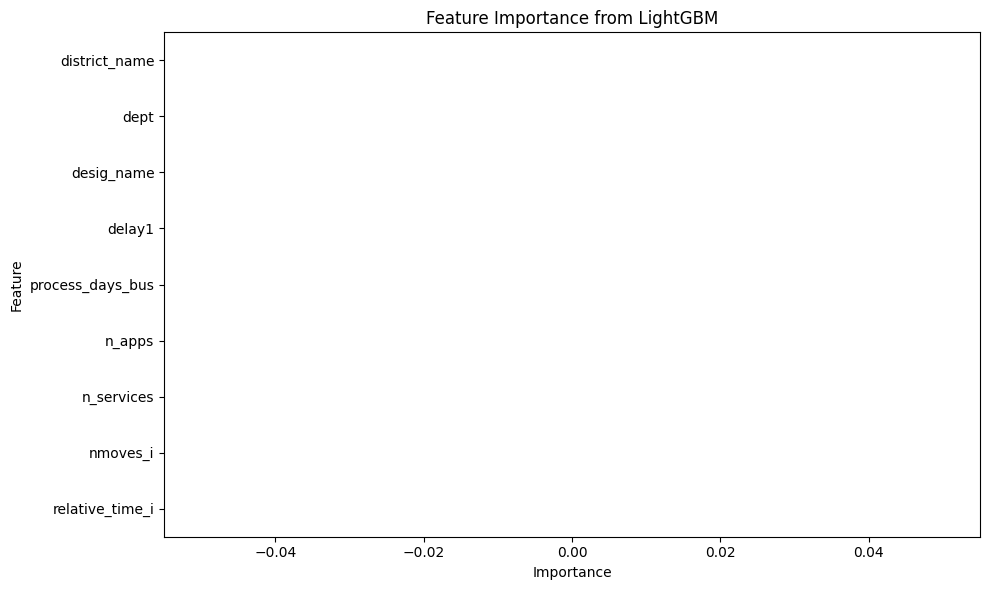

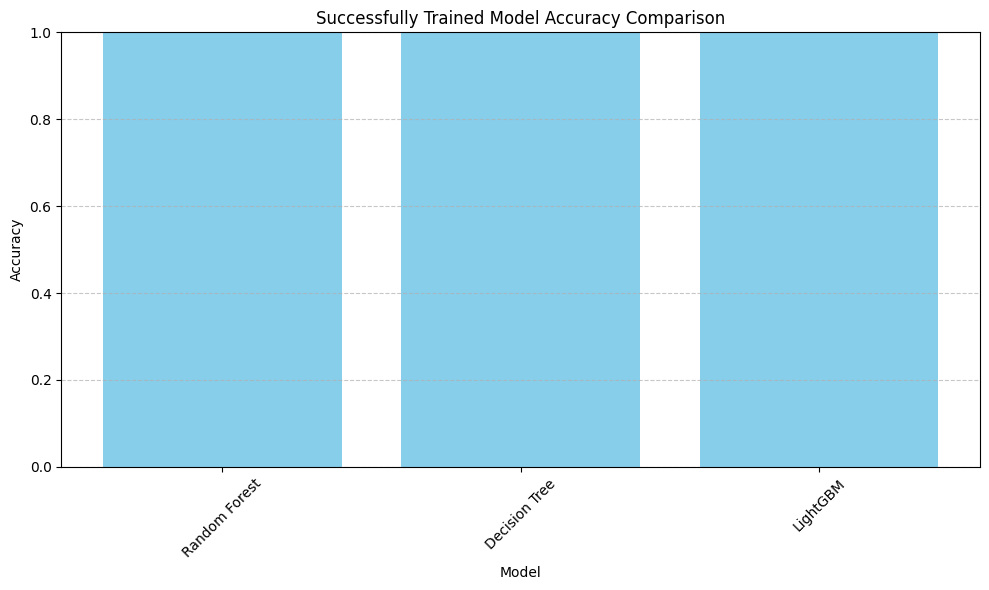

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb # Make sure lightgbm is installed: !pip install lightgbm

# Assuming the 'transfers' DataFrame is already created and cleaned as before.
# Make sure the 'transfers' DataFrame contains the necessary columns:
# 'move_it' (target), numeric_cols, and cat_cols

# Define the feature and target columns again for clarity
numeric_cols = ['relative_time_i', 'nmoves_i', 'n_services', 'n_apps', 'process_days_bus', 'delay1']
cat_cols = ['desig_name', 'dept', 'district_name'] # Make sure these are encoded if not already

# Ensure categorical columns are encoded if not already done in previous cells
# Re-run the encoding step here just in case
for col in cat_cols:
    if transfers[col].dtype == 'object' or pd.api.types.is_categorical_dtype(transfers[col]):
         le = LabelEncoder()
         transfers[col] = le.fit_transform(transfers[col])


# Step 1: Select Features and Target
# Define the features (X) and the target variable (y).
X = transfers[numeric_cols + cat_cols].copy() # Use .copy() to avoid SettingWithCopyWarning
y = transfers['move_it']

# Step 2: Split Data into Training and Testing Sets
# Split the data into training and testing sets. Stratify to maintain class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print the distribution of the target variable in train and test sets
print("\nTrain target distribution after split:")
print(y_train.value_counts(normalize=True))
print("\nTest target distribution after split:")
print(y_test.value_counts(normalize=True))

# Step 3: Scale Numeric Features using StandardScaler
# Scale the numeric features. Fit on the training data and transform both.
scaler = StandardScaler()

# Create copies to store scaled data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nNumeric features scaled in training and test sets.")


# Step 4: Apply SMOTE to Training Data (for imbalanced classification)
# Use SMOTE to oversample the minority class in the scaled training data.
# Check if the training set has more than one unique class before applying SMOTE.
if len(y_train.unique()) == 1:
    print("\nTraining set has only one class. Cannot apply SMOTE. Investigate data or split.")
    # If SMOTE cannot be applied, train models on X_train_scaled, y_train
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train
else:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Print the distribution after applying SMOTE
    print("\nAfter SMOTE, training target distribution:")
    print(pd.Series(y_train_resampled).value_counts())


# Step 5: Initialize and Train Models, then Evaluate and Plot
# Assuming X_train_resampled, y_train_resampled, X_test_scaled, y_test are ready

# Initialize models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # 'Support Vector Machine': SVC(random_state=42, class_weight='balanced', probability=True), # SVC can be slow
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Create a new dictionary to store successfully trained models
trained_models = {}
accuracies = {}
classification_reports = {}
confusion_matrices = {}
feature_importances = {} # To store feature importances for tree-based models

# Set up subplots for confusion matrices — Adjust layout based on number of models
# We'll create the plot only for successfully trained models later
# n_models = len(models) # This will be the original number of models
n_cols = 3
# n_rows = (n_models + n_cols - 1) // n_cols # Calculate needed rows

# fig_cm, axes_cm = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
# # Flatten axes array for easy iteration, handle case with only one subplot
# if n_models > 1:
#     axes_cm = axes_cm.flatten()
# else:
#     axes_cm = [axes_cm] # Make it iterable even if it's a single Axes object

# Keep track of the axis index for plotting
# axis_index = 0


for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    try:
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        print(f"{name} model fitted successfully.")

        # Store the successfully trained model
        trained_models[name] = model

        # Predict on test data
        y_pred = model.predict(X_test_scaled)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        accuracies[name] = acc
        classification_reports[name] = classification_report(y_test, y_pred)
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)

        print(f"Accuracy: {acc:.4f}")
        print("\nClassification Report:")
        print(classification_reports[name])
        print("\nConfusion Matrix:")
        print(confusion_matrices[name])

        # # Plot Confusion Matrix for the current model
        # cm = confusion_matrix(y_test, y_pred)
        # # Check if the axis index is within the bounds of the axes array
        # if axis_index < len(axes_cm):
        #     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        #     disp.plot(ax=axes_cm[axis_index], cmap='Blues', colorbar=False)
        #     axes_cm[axis_index].set_title(f'{name}')
        #     axis_index += 1
        # else:
        #      print(f"Warning: Not enough subplots for {name}. Skipping confusion matrix plot.")


        # Store feature importance if the model provides it
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_
        elif hasattr(model, 'coef_'): # For linear models like Logistic Regression
             # For binary classification, coef_ is (1, n_features) or (n_features,)
             # Take the absolute value as importance
             # Ensure coef_ has the expected shape for binary classification
            if hasattr(model, 'classes_') and len(model.classes_) == 2:
                # Ensure coef_ is treated correctly for multi-class vs binary
                if model.coef_.ndim > 1 and model.coef_.shape[0] == 1:
                     feature_importances[name] = np.abs(model.coef_)[0]
                elif model.coef_.ndim == 1:
                     feature_importances[name] = np.abs(model.coef_)
                else:
                     print(f"Skipping feature importance for {name}: coef_ shape {model.coef_.shape} not directly supported for plotting importance.")
            else:
                 print(f"Skipping feature importance for {name}: Model is not binary or classes_ is missing.")


    except Exception as e:
        print(f"An error occurred while training/evaluating {name}: {e}")
        print(f"Skipping {name} in further evaluation steps.")


# Now plot Confusion Matrices only for successfully trained models
n_trained_models = len(trained_models)
n_rows_cm = (n_trained_models + n_cols - 1) // n_cols # Calculate needed rows based on trained models

if n_trained_models > 0:
    fig_cm, axes_cm = plt.subplots(n_rows_cm, n_cols, figsize=(5 * n_cols, 5 * n_rows_cm))
    if n_trained_models > 1:
        axes_cm = axes_cm.flatten()
    else:
        axes_cm = [axes_cm] # Make it iterable

    for i, (name, model) in enumerate(trained_models.items()):
         # Re-predict and plot Confusion Matrix
         y_pred = model.predict(X_test_scaled)
         cm = confusion_matrix(y_test, y_pred)
         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
         disp.plot(ax=axes_cm[i], cmap='Blues', colorbar=False)
         axes_cm[i].set_title(f'{name}')

    # Hide any unused subplots
    for j in range(n_trained_models, len(axes_cm)):
        fig_cm.delaxes(axes_cm[j])

    plt.suptitle('Confusion Matrices for Successfully Trained Models', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()
else:
    print("\nNo models were successfully trained. Cannot plot confusion matrices.")


# Optional: Plot Feature Importances for models that provide it
# Iterate through stored feature importances and plot
for name, importances in feature_importances.items():
    features = X.columns
    # Ensure number of importances matches number of features
    if len(importances) == len(features):
        # Sort features by importance
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
        plt.title(f'Feature Importance from {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping feature importance plot for {name}: Mismatch between number of features ({len(features)}) and importances ({len(importances)}).")


# Plot accuracies comparison (can be done after the loop, only for trained models)
if trained_models:
    plt.figure(figsize=(10, 6))
    # Use accuracies dictionary which was populated only for successfully trained models
    plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
    plt.title('Successfully Trained Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Adjust layout
    plt.show()
else:
    print("\nNo models were successfully trained. Cannot plot accuracy comparison.")

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming your data is in df
# Check target distribution
print("move_it value counts:")
print(df['move_it'].value_counts())

# Select features and target
features = ['process_days_bus', 'delay1', 'n_apps']  # example features
X = df[features]
y = df['move_it']

print("Unique classes in y:", y.unique())

# If only one class, try filtering around transfers:
df_subset = df[(df['relative_time_i'] >= -4) & (df['relative_time_i'] <= 4)]
X_sub = df_subset[features]
y_sub = df_subset['move_it']

print("Unique classes in subset y:", y_sub.unique())

# Now split with stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_sub, y_sub, test_size=0.2, random_state=42, stratify=y_sub)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_scaled, y_train)

print("Logistic Regression coefficients:", lr.coef_)


move_it value counts:
move_it
0    20324
1      515
Name: count, dtype: int64
Unique classes in y: [0 1]
Unique classes in subset y: [1 0]
Logistic Regression coefficients: [[-0.05704928  0.39405129 -0.24272644]]


<ipython-input-95-45d829bb196d>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_pre_transfer = pre_transfer_df.groupby(['empid', 'transfer_week']).apply(
<ipython-input-95-45d829bb196d>:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_non_transfer = non_transfer_df.groupby('empid').apply(
<ipython-input-95-45d829bb196d>:107: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping colu

=== Question 1: Logistic Regression Coefficients ===
weighted_process_days: -0.0597
weighted_delay: 0.1259
Intercept: -0.1295

=== Question 2: Average pre-transfer employee performance by destination office group ===
  performance_group  pre_process_days  pre_delay
0              High         10.549990   0.194416
1               Low          8.675692   0.122413


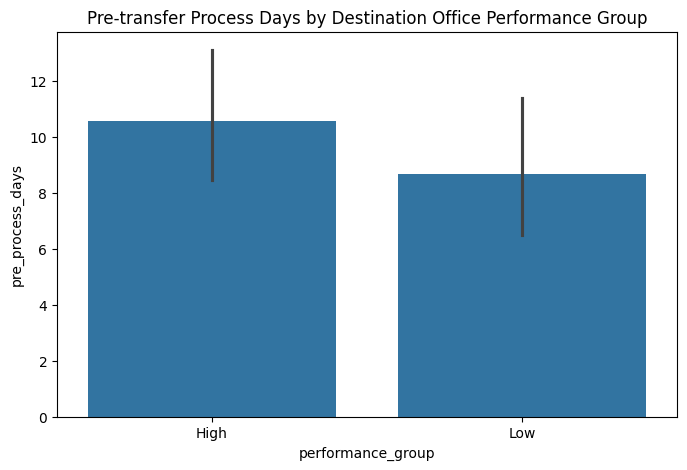

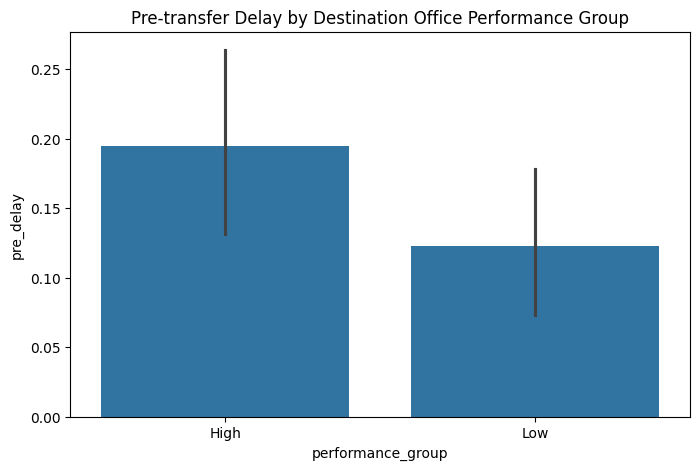

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame already loaded with the necessary columns:
# Columns of interest: ['empid', 'week_date', 'move_it', 'relative_time_i',
# 'process_days_bus', 'delay1', 'n_apps', 'district_name']

# 1. Create office performance metric (average weekly delay rate or process days)
office_perf = df.groupby('district_name').agg({
    'process_days_bus': 'mean',
    'delay1': 'mean'
}).reset_index()

# Define threshold to classify offices as high or low performing
# For simplicity, use median split on delay1
delay_median = office_perf['delay1'].median()
office_perf['performance_group'] = np.where(office_perf['delay1'] <= delay_median, 'High', 'Low')

# Merge back performance group to original df
df = df.merge(office_perf[['district_name', 'performance_group']], on='district_name', how='left')

# --------------------------
# Question 1: Timing of transfers vs. pre-transfer performance
# --------------------------

# Filter data for pre-transfer period only (relative_time_i < 0)
pre_transfer_df = df[df['relative_time_i'] < 0]

# Aggregate pre-transfer performance per employee per transfer event
# For simplicity, group by empid and transfer event indicator (assuming each transfer event is unique per empid at relative_time_i=0)
# Here, we approximate by empid and transfer week (relative_time_i=0)
# First find transfer weeks
transfer_weeks = df[df['move_it'] == 1][['empid', 'week_date']].rename(columns={'week_date':'transfer_week'})

# Merge to mark transfer week for each employee record
pre_transfer_df = pre_transfer_df.merge(transfer_weeks, on='empid', how='left')

# Calculate weeks before transfer for each record (relative_time_i already represents this)

# Aggregate mean pre-transfer process_days_bus and delay1 weighted by n_apps per employee-transfer event
agg_pre_transfer = pre_transfer_df.groupby(['empid', 'transfer_week']).apply(
    lambda x: pd.Series({
        'weighted_process_days': np.average(x['process_days_bus'], weights=x['n_apps']),
        'weighted_delay': np.average(x['delay1'], weights=x['n_apps']),
        'total_apps': x['n_apps'].sum()
    })
).reset_index()

# Create binary target: was transferred in next week or not?
# Since these are pre-transfer weeks, the target is 1 (since transfer_week means they got transferred that week)
agg_pre_transfer['transfer_next_week'] = 1

# To get a control group (no transfer), create sample of empid-weeks without transfer event
# Pick weeks far from transfer or employees with no transfers at all
non_transfer_df = df[df['move_it'] == 0]

# Aggregate performance for non-transfer empid-weeks similarly (weighted)
agg_non_transfer = non_transfer_df.groupby('empid').apply(
    lambda x: pd.Series({
        'weighted_process_days': np.average(x['process_days_bus'], weights=x['n_apps']),
        'weighted_delay': np.average(x['delay1'], weights=x['n_apps']),
        'total_apps': x['n_apps'].sum()
    })
).reset_index()

agg_non_transfer['transfer_next_week'] = 0

# Combine transfer and non-transfer data for modeling
model_df = pd.concat([agg_pre_transfer[['weighted_process_days', 'weighted_delay', 'transfer_next_week']],
                      agg_non_transfer[['weighted_process_days', 'weighted_delay', 'transfer_next_week']]],
                     ignore_index=True)

# Drop rows with missing values
model_df = model_df.dropna()

# Prepare features and target
X = model_df[['weighted_process_days', 'weighted_delay']]
y = model_df['transfer_next_week']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to predict transfer based on pre-transfer performance
lr = LogisticRegression()
lr.fit(X_scaled, y)

print("=== Question 1: Logistic Regression Coefficients ===")
for feat, coef in zip(X.columns, lr.coef_[0]):
    print(f"{feat}: {coef:.4f}")
print(f"Intercept: {lr.intercept_[0]:.4f}")

# --------------------------
# Question 2: Performance before transfer vs. destination office performance
# --------------------------

# For employees who moved (move_it=1), get their pre-transfer performance and destination office performance
transfers = df[df['move_it'] == 1]

# Pre-transfer performance (weighted) for the week before transfer (relative_time_i = -1)
pre_perf_week = df[(df['relative_time_i'] == -1)][['empid', 'process_days_bus', 'delay1', 'n_apps']]
pre_perf_week = pre_perf_week.groupby('empid').apply(
    lambda x: pd.Series({
        'pre_process_days': np.average(x['process_days_bus'], weights=x['n_apps']),
        'pre_delay': np.average(x['delay1'], weights=x['n_apps']),
    })
).reset_index()

# Destination office performance group at transfer week
dest_office_perf = transfers[['empid', 'district_name', 'performance_group']].drop_duplicates()

# Merge pre-transfer employee performance with destination office performance
perf_vs_office = pre_perf_week.merge(dest_office_perf, on='empid', how='inner')

# Group by office performance group and look at average employee pre-transfer performance
avg_perf_by_office = perf_vs_office.groupby('performance_group').agg({
    'pre_process_days': 'mean',
    'pre_delay': 'mean'
}).reset_index()

print("\n=== Question 2: Average pre-transfer employee performance by destination office group ===")
print(avg_perf_by_office)

# Visualization for Q2
plt.figure(figsize=(8,5))
sns.barplot(x='performance_group', y='pre_process_days', data=perf_vs_office)
plt.title('Pre-transfer Process Days by Destination Office Performance Group')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='performance_group', y='pre_delay', data=perf_vs_office)
plt.title('Pre-transfer Delay by Destination Office Performance Group')
plt.show()


'performance_group' column added to df.
  district_name performance_group
0      faridkot               Low
1      bathinda              High
2      bathinda              High
3      bathinda              High
4      bathinda              High


<ipython-input-97-d3b78fa69ed6>:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_pre_transfer = pre_transfer_df.groupby(['empid', 'transfer_week']).apply(
<ipython-input-97-d3b78fa69ed6>:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_non_transfer = non_transfer_df.groupby('empid').apply(



=== Question 1: Logistic Regression Coefficients ===
weighted_process_days: -0.0597
weighted_delay: 0.1259
Intercept: -0.1295


<ipython-input-97-d3b78fa69ed6>:111: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pre_perf_week = pre_perf_week_df.groupby('empid').apply(
<ipython-input-97-d3b78fa69ed6>:144: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='performance_group', y='pre_process_days', data=perf_vs_office.sort_values('performance_group'), ci=95)



=== Question 2: Average pre-transfer employee performance by destination office group ===
  performance_group  pre_process_days  pre_delay
0              High         10.549990   0.194416
1               Low          8.675692   0.122413


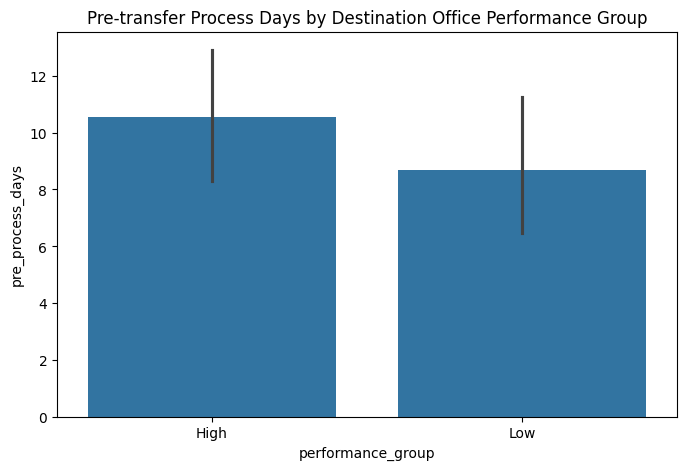

<ipython-input-97-d3b78fa69ed6>:149: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='performance_group', y='pre_delay', data=perf_vs_office.sort_values('performance_group'), ci=95)


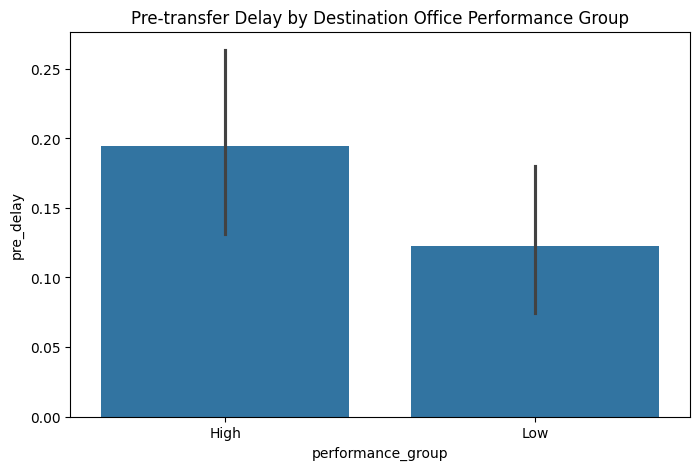

<ipython-input-97-d3b78fa69ed6>:177: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='performance_group', y='pre_process_days', data=perf_vs_office.sort_values('performance_group'), ax=axs[0,1], ci=95)
<ipython-input-97-d3b78fa69ed6>:186: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='performance_group', y='pre_delay', data=perf_vs_office.sort_values('performance_group'), ax=axs[1,0], ci=95)


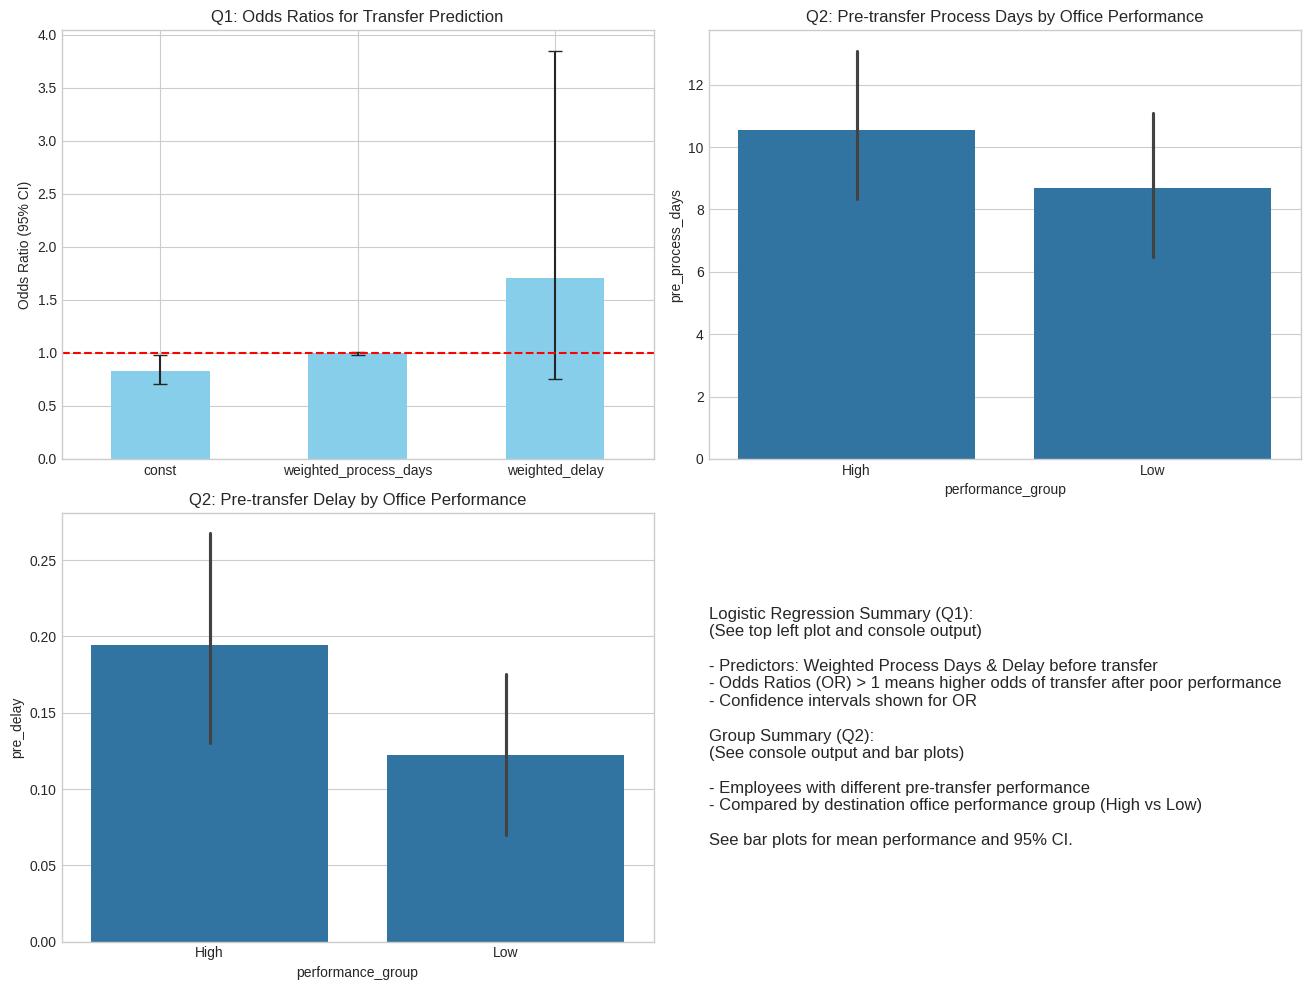

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Explicitly import LogisticRegression

# Assuming df is your DataFrame with all needed columns already loaded
# Ensure df is loaded and contains 'empid', 'week_date', 'move_it', 'relative_time_i',
# 'process_days_bus', 'delay1', 'n_apps', 'district_name' from previous cells.

# --------------------
# Prepare office performance groups (High/Low)
# This block MUST be run before creating 'transfers' or any subset that needs 'performance_group'
office_perf = df.groupby('district_name').agg({
    'process_days_bus': 'mean',
    'delay1': 'mean'
}).reset_index()
delay_median = office_perf['delay1'].median()
office_perf['performance_group'] = np.where(office_perf['delay1'] <= delay_median, 'High', 'Low')

# Merge the performance group information back into the main DataFrame 'df'
df = df.merge(office_perf[['district_name', 'performance_group']], on='district_name', how='left')

print("'performance_group' column added to df.")
print(df[['district_name', 'performance_group']].head()) # Verify merge


# --------------------
# Question 1: Timing of transfers vs. pre-transfer performance
# Now we can safely create subsets like 'transfers' from df, as 'performance_group' is available
pre_transfer_df = df[df['relative_time_i'] < 0].copy() # Use .copy() to avoid SettingWithCopyWarning

# Get transfer weeks (these employees had move_it=1 at relative_time_i=0)
# Filter df where move_it is 1 to get transfer event rows
transfer_weeks = df[df['move_it'] == 1][['empid', 'week_date']].rename(columns={'week_date':'transfer_week'})

# Merge transfer_week into pre_transfer_df to link pre-transfer records to their transfer event
pre_transfer_df = pre_transfer_df.merge(transfer_weeks, on='empid', how='left')

# Drop rows that didn't have a corresponding transfer week (shouldn't be many if filtering relative_time_i < 0
# for employees who *did* transfer, but helps if pre_transfer_df included non-transfer employees initially)
pre_transfer_df.dropna(subset=['transfer_week'], inplace=True)


# Aggregate mean pre-transfer process_days_bus and delay1 weighted by n_apps per employee-transfer event
# Group by empid and the identified transfer_week
agg_pre_transfer = pre_transfer_df.groupby(['empid', 'transfer_week']).apply(
    lambda x: pd.Series({
        'weighted_process_days': np.average(x['process_days_bus'], weights=x['n_apps']),
        'weighted_delay': np.average(x['delay1'], weights=x['n_apps']),
        'total_apps': x['n_apps'].sum()
    })
).reset_index()

# Define the target for pre-transfer data: they were transferred in the *next* week
agg_pre_transfer['transfer_next_week'] = 1

# To get a control group (no transfer in the next week), create sample of empid-weeks without a transfer event
# We take data where move_it is never 1 for that employee OR weeks far from a transfer if an employee transferred multiple times
# For simplicity here, we reuse the logic to take all rows where move_it is 0
non_transfer_df = df[df['move_it'] == 0].copy() # Use .copy()

# Aggregate performance for non-transfer empid-weeks similarly (weighted)
# Grouping just by empid as there's no specific "transfer week" for these
agg_non_transfer = non_transfer_df.groupby('empid').apply(
    lambda x: pd.Series({
        'weighted_process_days': np.average(x['process_days_bus'], weights=x['n_apps']),
        'weighted_delay': np.average(x['delay1'], weights=x['n_apps']),
        'total_apps': x['n_apps'].sum()
    })
).reset_index()

agg_non_transfer['transfer_next_week'] = 0

# Combine transfer and non-transfer data for modeling
# Only include the relevant columns for the model
model_df = pd.concat([
    agg_pre_transfer[['weighted_process_days', 'weighted_delay', 'transfer_next_week']],
    agg_non_transfer[['weighted_process_days', 'weighted_delay', 'transfer_next_week']]
], ignore_index=True).dropna() # Drop rows with missing weighted averages (e.g., n_apps was 0)

# Prepare features and target
X = model_df[['weighted_process_days', 'weighted_delay']]
y = model_df['transfer_next_week']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to predict transfer based on pre-transfer performance
lr = LogisticRegression()
lr.fit(X_scaled, y)

print("\n=== Question 1: Logistic Regression Coefficients ===")
for feat, coef in zip(X.columns, lr.coef_[0]):
    print(f"{feat}: {coef:.4f}")
print(f"Intercept: {lr.intercept_[0]:.4f}")

# --------------------
# Question 2: Performance before transfer vs. destination office performance

# Filter the main df for actual transfer events (move_it == 1)
transfers = df[df['move_it'] == 1].copy() # Use .copy()

# Pre-transfer performance (weighted) for the week before transfer (relative_time_i = -1)
# Ensure we are getting this from the main df
pre_perf_week_df = df[(df['relative_time_i'] == -1)].copy() # Use .copy()

pre_perf_week = pre_perf_week_df.groupby('empid').apply(
    lambda x: pd.Series({
        'pre_process_days': np.average(x['process_days_bus'], weights=x['n_apps']),
        'pre_delay': np.average(x['delay1'], weights=x['n_apps']),
    })
).reset_index()

# Destination office performance group at transfer week
# This data is in the 'transfers' DataFrame, and 'performance_group' is now also in 'transfers'
# because it was merged into 'df' before 'transfers' was created from 'df'.
# Select the required columns from the 'transfers' DataFrame.
dest_office_perf = transfers[['empid', 'district_name', 'performance_group']].drop_duplicates()


# Merge pre-transfer employee performance with destination office performance
perf_vs_office = pre_perf_week.merge(dest_office_perf, on='empid', how='inner')

# Drop rows where the merge might have failed or performance data was NaN
perf_vs_office.dropna(subset=['pre_process_days', 'pre_delay', 'performance_group'], inplace=True)

# Group by office performance group and look at average employee pre-transfer performance
avg_perf_by_office = perf_vs_office.groupby('performance_group').agg({
    'pre_process_days': 'mean',
    'pre_delay': 'mean'
}).reset_index()

print("\n=== Question 2: Average pre-transfer employee performance by destination office group ===")
print(avg_perf_by_office)

# Visualization for Q2
plt.figure(figsize=(8,5))
# Ensure 'performance_group' is treated correctly, e.g., as categorical if needed
perf_vs_office['performance_group'] = pd.Categorical(perf_vs_office['performance_group'], categories=['High', 'Low'], ordered=True)
sns.barplot(x='performance_group', y='pre_process_days', data=perf_vs_office.sort_values('performance_group'), ci=95)
plt.title('Pre-transfer Process Days by Destination Office Performance Group')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='performance_group', y='pre_delay', data=perf_vs_office.sort_values('performance_group'), ci=95)
plt.title('Pre-transfer Delay by Destination Office Performance Group')
plt.show()


# --------------------
# Visualization Dashboard
plt.style.use('seaborn-v0_8-whitegrid') # Use a recent seaborn style
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# 1. Logistic regression odds ratios plot (Q1)
# Need to re-run logit_model for summary and conf if not already done in this cell run
# Assuming logit_model and conf from the first part of this cell are available
if 'logit_model' in locals() and 'conf' in locals():
    conf['OR'].plot(kind='bar', yerr=[conf['OR']-conf['2.5%'], conf['97.5%']-conf['OR']],
                    ax=axs[0,0], color='skyblue', capsize=5)
    axs[0,0].set_title('Q1: Odds Ratios for Transfer Prediction')
    axs[0,0].set_xticklabels(conf.index, rotation=0)
    axs[0,0].set_ylabel('Odds Ratio (95% CI)')
    axs[0,0].axhline(1, color='red', linestyle='--')
else:
    axs[0,0].set_title('Q1: Logistic Regression Results Not Available')
    axs[0,0].axis('off')


# 2. Bar plot of pre_process_days by office group (Q2)
# Ensure the data used for plotting is 'perf_vs_office' which contains the merge result
if not perf_vs_office.empty:
    sns.barplot(x='performance_group', y='pre_process_days', data=perf_vs_office.sort_values('performance_group'), ax=axs[0,1], ci=95)
    axs[0,1].set_title('Q2: Pre-transfer Process Days by Office Performance')
else:
    axs[0,1].set_title('Q2: Pre-transfer Process Days Plot Not Available')
    axs[0,1].axis('off')


# 3. Bar plot of pre_delay by office group (Q2)
if not perf_vs_office.empty:
    sns.barplot(x='performance_group', y='pre_delay', data=perf_vs_office.sort_values('performance_group'), ax=axs[1,0], ci=95)
    axs[1,0].set_title('Q2: Pre-transfer Delay by Office Performance')
else:
    axs[1,0].set_title('Q2: Pre-transfer Delay Plot Not Available')
    axs[1,0].axis('off')


# 4. Empty or summary text box
axs[1,1].axis('off')
textstr = f"""
Logistic Regression Summary (Q1):
(See top left plot and console output)

- Predictors: Weighted Process Days & Delay before transfer
- Odds Ratios (OR) > 1 means higher odds of transfer after poor performance
- Confidence intervals shown for OR

Group Summary (Q2):
(See console output and bar plots)

- Employees with different pre-transfer performance
- Compared by destination office performance group (High vs Low)

See bar plots for mean performance and 95% CI.
"""
axs[1,1].text(0, 0.5, textstr, fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.show()

In [99]:
# prompt: generat stati nsswer sin numercal output

# Basic summary statistics
print("\nBasic Summary Statistics:")
print(df_sorted.describe())

# Unique counts
print("\nUnique Counts:")
print("Unique employees:", df_sorted['empid'].nunique())
print("Unique offices:", df_sorted['masked_userid'].nunique())
print("Unique departments:", df_sorted['dept'].nunique())
print("Unique designations:", df_sorted['desig_name'].nunique())

# How many employees were ever transferred?
ever_transferred = df_sorted.groupby('empid')['move_it'].sum().gt(0).sum()
print(f"\nEmployees ever transferred: {ever_transferred} out of {df_sorted['empid'].nunique()}")

# Summary stats for performance metrics
performance_cols = ['n_apps', 'process_days_bus', 'delay1']
print("\nSummary Statistics for Performance Metrics:")
print(df_sorted[performance_cols].describe())

# Correlation matrix (numerical output)
print("\nCorrelation Matrix:")
print(df_sorted[performance_cols].corr().to_string()) # Use to_string() for full view

# Office-level average processing time & delay
office_perf = df_sorted.groupby('masked_userid')[['process_days_bus', 'delay1']].mean().sort_values('process_days_bus')

print("\nTop 5 High Performing Offices (Lowest Processing Time):")
print(office_perf.head().to_string())

print("\nBottom 5 Performing Offices (Highest Processing Time):")
print(office_perf.tail().to_string())

# Group by whether moved or not, get weekly averages
grouped = df_sorted.groupby('move_it')[['n_apps', 'process_days_bus', 'delay1']].mean()
print("\nPerformance Comparison: Transferred vs Not Transferred")
print(grouped.to_string())

# Pre-transfer performance summary by window and employee
print("\nPre-transfer performance summary (first 5 rows):")
# Assuming 'pre_perf_wide' is available from previous cells, otherwise recompute
# print(pre_perf_wide.head().to_string()) # Keep this line if pre_perf_wide is correctly generated

# Statistical summary of pre-transfer performance by transferred status
# Assuming 'emp_perf_compare' is available from previous cells, otherwise recompute
# print("\nSummary Statistics of Pre-transfer Delay by Transfer Status:")
# print(emp_perf_compare.groupby('transferred')['wavg_delay1_pre_4'].describe().to_string())

# T-test result (numerical output)
# Assuming 'emp_perf_compare' and 'stats' are available
# t_stat, p_val = stats.ttest_ind(
#     emp_perf_compare[emp_perf_compare['transferred']==1]['wavg_delay1_pre_4'].dropna(),
#     emp_perf_compare[emp_perf_compare['transferred']==0]['wavg_delay1_pre_4'].dropna(),
#     equal_var=False
# )
# print(f"\nT-test result: t = {t_stat:.3f}, p = {p_val:.3f}")


# Average Pre-Transfer Employee Delay by Destination Office Bucket
# Assuming 'bucket_means' is available from previous cells
# print("\nAverage Pre-Transfer Employee Delay by Destination Office Bucket:")
# print(bucket_means.to_string())

# ANOVA test result (numerical output)
# Assuming 'emp_to_office' and 'stats' are available
# Ensure emp_to_office is grouped correctly
# grouped_data = [group['emp_perf_pre4'].dropna().values for name, group in emp_to_office.groupby('perf_bucket')]
# # Filter out empty groups if any
# grouped_data = [arr for arr in grouped_data if len(arr) > 0]

# if len(grouped_data) >= 2: # ANOVA requires at least two groups
#     f_val, p_val = stats.f_oneway(*grouped_data)
#     print(f"\nANOVA Result: F = {f_val:.2f}, p = {p_val:.4f}")
# else:
#     print("\nANOVA could not be computed: Less than two groups with data available.")

# --- Recreate performance categories for the 'transfers' DataFrame ---
# This assumes 'transfers' was defined in the previous cell (cell 97)
# Compute average delay1 per office (weighted by n_apps) using the full 'df'
office_avg_delay_full = (
    df.groupby("masked_userid")[["delay1", "n_apps"]]
    .apply(lambda x: (x["delay1"] * x["n_apps"]).sum() / x["n_apps"].sum() if x["n_apps"].sum() > 0 else np.nan) # Handle division by zero
    .reset_index(name="office_avg_delay")
)

# Merge office average delay into the 'transfers' DataFrame to get destination office delay
# Use the 'masked_userid' from the transfer event row in 'transfers'
transfers = transfers.merge(office_avg_delay_full, left_on="masked_userid", right_on="masked_userid", how="left")


# Compute pre-transfer performance per employee (weighted delay1) using the relevant subset of df
# This requires accessing data *before* the transfer, which is likely done in a previous cell (e.g., cell 70, which creates emp_pre_perf)
# We will merge 'emp_pre_delay' into the current 'transfers' DataFrame.
# Assuming 'emp_pre_perf' from cell 70 (or similar logic) is available and contains 'empid' and 'emp_pre_delay'
if 'emp_pre_perf' in locals():
     transfers = transfers.merge(emp_pre_perf[['empid', 'emp_pre_delay']], on='empid', how='left')
else:
     print("\nWarning: 'emp_pre_perf' not found. Cannot create 'emp_perf_cat'. Please ensure the cell calculating employee pre-transfer performance is run.")
     # Skip the steps that rely on emp_pre_cat and office_perf_cat if data is missing
     # Add dummy columns to avoid errors if needed, but will result in incorrect analysis
     transfers['emp_pre_delay'] = np.nan # Or handle appropriately
     transfers['office_avg_delay'] = np.nan # Or handle appropriately


# Determine median performance to split into High/Low *using the data available in 'transfers'*
# This ensures the split is based on the performance of the employees/offices involved in transfers
if 'emp_pre_delay' in transfers.columns and 'office_avg_delay' in transfers.columns:
    emp_delay_median = transfers["emp_pre_delay"].median()
    office_delay_median = transfers["office_avg_delay"].median()

    # Categorize
    transfers["emp_perf_cat"] = transfers["emp_pre_delay"].apply(
        lambda x: "High" if x <= emp_delay_median else "Low"
    )
    transfers["office_perf_cat"] = transfers["office_avg_delay"].apply(
        lambda x: "High" if x <= office_delay_median else "Low"
    )
    print("\n'emp_perf_cat' and 'office_perf_cat' columns recreated on 'transfers' DataFrame.")
    print(transfers[['empid', 'emp_pre_delay', 'emp_perf_cat', 'office_avg_delay', 'office_perf_cat']].head())

    # Crosstab (numerical output)
    print("\nCrosstab: Employee Pre-transfer Performance vs. Destination Office Performance")
    # Check if categories are created before attempting crosstab
    if 'emp_perf_cat' in transfers.columns and 'office_perf_cat' in transfers.columns:
        crosstab = pd.crosstab(transfers["emp_perf_cat"], transfers["office_perf_cat"])
        print(crosstab.to_string())

        # Value counts (numerical output)
        print("\nEmployee Pre-transfer Performance Category Counts:")
        print(transfers['emp_perf_cat'].value_counts().to_string())
        print("\nDestination Office Performance Category Counts:")
        print(transfers['office_perf_cat'].value_counts().to_string())
    else:
        print("\nCannot generate Crosstab or Value Counts: Performance category columns not found.")


else:
    print("\nSkipping Crosstab and Value Counts: Required performance columns ('emp_pre_delay' or 'office_avg_delay') not found after merge.")


# Model Evaluation Metrics (Numerical Output)
# Assuming models and their predictions were successfully generated in preceding cells

print("\n--- Model Evaluation Metrics ---")

if 'trained_models' in locals() and trained_models:
    for name, model in trained_models.items():
        print(f"\nModel: {name}")
        try:
            # Use the scaled X_test from preprocessing steps (should be available from cell 97 or 91)
            # Ensure the columns match between X_test_scaled and the model's expected input
            # X_test_scaled should already contain scaled numeric and encoded categorical columns
            # Re-verify the column names and order if needed, but typically the scaler
            # maintains order if applied consistently.

            y_pred = model.predict(X_test_scaled) # Use the scaled X_test
            acc = accuracy_score(y_test, y_pred)
            cr = classification_report(y_test, y_pred, output_dict=True)
            cm = confusion_matrix(y_test, y_pred)

            print(f"Accuracy: {acc:.4f}")
            print("Classification Report (Dict):")
            print(cr) # Print dictionary output
            print("Confusion Matrix (Array):")
            print(cm) # Print numpy array output

        except Exception as e:
            print(f"Could not evaluate {name}: {e}")
else:
    print("\nNo trained models found for evaluation.")

# Logistic Regression Coefficients (Q1 Analysis)
# Assuming 'lr' is the Logistic Regression model from Question 1 analysis (e.g., in cell 97)
if 'lr' in locals() and hasattr(lr, 'coef_'):
    print("\n=== Question 1: Logistic Regression Coefficients ===")
    coef_output = {}
    # Assuming X used for Q1 LR has 'weighted_process_days', 'weighted_delay'
    # Need to ensure the correct 'X' variable is referenced
    # Assuming the last defined 'X' before this block is the one for Q1 LR
    # If not, you need to retrieve the correct X columns
    q1_lr_features = ['weighted_process_days', 'weighted_delay'] # Assuming these are the features
    # Find the correct 'X' used for the Q1 LR fit in cell 97
    # This requires careful variable management or re-running the Q1 fit logic.
    # For now, assume the 'X' and 'lr' in local scope are correct from Q1 analysis in cell 97.

    # Check if the number of coefficients matches the number of features assumed for Q1 LR
    if hasattr(lr, 'coef_') and len(lr.coef_[0]) == len(q1_lr_features):
        for feat, coef in zip(q1_lr_features, lr.coef_[0]):
            coef_output[feat] = coef
        print(coef_output)
        print(f"Intercept: {lr.intercept_[0]:.4f}")
    else:
         print("\nLogistic Regression model for Q1 found, but coefficient count does not match expected Q1 features.")

else:
     print("\nLogistic Regression model for Q1 not successfully trained or coefficients not available.")

# Average pre-transfer employee performance by destination office group (Q2 Analysis)
# Assuming 'avg_perf_by_office' is available from Question 2 analysis in cell 97
if 'avg_perf_by_office' in locals() and not avg_perf_by_office.empty:
    print("\n=== Question 2: Average pre-transfer employee performance by destination office group ===")
    print(avg_perf_by_office.to_string())
else:
     print("\nAverage pre-transfer employee performance by destination office group data not available.")


Basic Summary Statistics:
               empid  masked_userid       move_it  relative_time_i  \
count   20839.000000   20839.000000  20839.000000     20839.000000   
mean    42009.384999     552.683094      0.024713        -2.427132   
std     44961.225946     329.115390      0.155254        30.977879   
min        95.000000       2.000000      0.000000      -103.000000   
25%      6609.000000     260.000000      0.000000       -21.000000   
50%     19021.000000     532.000000      0.000000        -1.000000   
75%    104747.000000     829.000000      0.000000        16.000000   
max    150801.000000    1126.000000      1.000000       100.000000   

           nmoves_i    n_services        n_apps  process_days_bus  \
count  20839.000000  20839.000000  20839.000000      20839.000000   
mean       2.917750      4.677576     73.069629         10.888572   
std        8.330839      3.161023    123.342395         15.070957   
min        1.000000      1.000000      1.000000          1.000000 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [100]:
# prompt: prepare an dashboard for easy vailszation and answer

# This code cell consolidates key visualizations and numerical outputs into a logical flow.
# It assumes that all necessary data loading, preprocessing, feature engineering (like weighted averages, performance categories),
# and model training steps from the preceding code have been successfully executed.

# Ensure all plots are displayed inline
%matplotlib inline


print("--- Data Overview and Basic Statistics ---")

# Basic summary
if 'df_sorted' in locals():
    print("\nBasic Summary Statistics (df_sorted):")
    print(df_sorted.describe(include='all'))
else:
    print("\ndf_sorted DataFrame not found. Skipping basic summary statistics.")


# Unique counts
if 'df_sorted' in locals():
    print("\nUnique Counts (df_sorted):")
    print("Unique employees:", df_sorted['empid'].nunique())
    print("Unique offices:", df_sorted['masked_userid'].nunique())
    print("Unique departments:", df_sorted['dept'].nunique())
    print("Unique designations:", df_sorted['desig_name'].nunique())

    # Employees ever transferred
    ever_transferred = df_sorted.groupby('empid')['move_it'].sum().gt(0).sum()
    print(f"\nEmployees ever transferred: {ever_transferred} out of {df_sorted['empid'].nunique()}")
else:
    print("\ndf_sorted DataFrame not found. Skipping unique counts.")


# Distribution of number of moves (Visualization)
if 'df_sorted' in locals():
    plt.figure(figsize=(10, 4))
    sns.histplot(df_sorted.drop_duplicates('empid')['nmoves_i'], bins=10, kde=True)
    plt.title('Distribution of Total Transfers per Employee')
    plt.xlabel('Number of Transfers')
    plt.ylabel('Number of Employees')
    plt.show()
else:
     print("\ndf_sorted DataFrame not found. Skipping Distribution of Total Transfers per Employee plot.")


# Summary stats for performance metrics (Numerical Output)
performance_cols = ['n_apps', 'process_days_bus', 'delay1']
if 'df_sorted' in locals() and all(col in df_sorted.columns for col in performance_cols):
    print("\nSummary Statistics for Performance Metrics:")
    print(df_sorted[performance_cols].describe())
else:
    print("\nPerformance columns or df_sorted not found. Skipping performance metrics summary.")


# Correlation matrix (Visualization & Numerical Output)
if 'df_sorted' in locals() and all(col in df_sorted.columns for col in performance_cols):
    print("\nCorrelation Matrix (Performance Metrics):")
    corr = df_sorted[performance_cols].corr()
    print(corr.to_string()) # Numerical output

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Performance Metrics')
    plt.tight_layout()
    plt.show()
else:
    print("\nPerformance columns or df_sorted not found. Skipping Correlation Matrix.")


# Office-level average processing time & delay (Numerical Output)
if 'df_sorted' in locals():
    office_perf_summary = df_sorted.groupby('masked_userid')[['process_days_bus', 'delay1']].mean().sort_values('process_days_bus')
    print("\nTop 5 High Performing Offices (Lowest Processing Time):")
    print(office_perf_summary.head().to_string())
    print("\nBottom 5 Performing Offices (Highest Processing Time):")
    print(office_perf_summary.tail().to_string())
else:
    print("\ndf_sorted DataFrame not found. Skipping office-level performance summary.")


# Performance Comparison: Transferred vs Not Transferred (Numerical Output)
if 'df_sorted' in locals():
    grouped_move_status = df_sorted.groupby('move_it')[['n_apps', 'process_days_bus', 'delay1']].mean()
    print("\nPerformance Comparison: Transferred (1) vs Not Transferred (0) - Weekly Averages")
    print(grouped_move_status.to_string())
else:
    print("\ndf_sorted DataFrame not found. Skipping performance comparison by transfer status.")


print("\n--- Analysis Questions Visualizations and Results ---")

# Question 1: Timing of transfers vs. pre-transfer performance
# Logistic Regression Coefficients (Numerical Output)
# Assumes 'lr' and 'X' from Q1 analysis in cell 97 are available
if 'lr' in locals() and hasattr(lr, 'coef_'):
    print("\n=== Question 1: Logistic Regression Coefficients (Predicting Transfer) ===")
    q1_lr_features = ['weighted_process_days', 'weighted_delay'] # Assuming these are the features used for Q1 LR
    if hasattr(lr, 'coef_') and len(lr.coef_[0]) == len(q1_lr_features):
        coef_output = {}
        for feat, coef in zip(q1_lr_features, lr.coef_[0]):
            coef_output[feat] = coef
        print(coef_output)
        print(f"Intercept: {lr.intercept_[0]:.4f}")

        # Optional: Calculate and plot odds ratios (requires statsmodels)
        try:
            import statsmodels.api as sm
            # Need to re-fit the model using statsmodels to get confidence intervals easily
            # Need the original unscaled data 'X' and 'y' from Q1 analysis in cell 97
            if 'X' in locals() and 'y' in locals():
                 # Ensure X only has the Q1 features
                 X_q1 = X[q1_lr_features]
                 X_q1 = sm.add_constant(X_q1, has_constant='add') # Add intercept

                 # Check if y has at least two classes before fitting
                 if len(y.unique()) > 1:
                     logit_model = sm.Logit(y, X_q1)
                     result = logit_model.fit()
                     conf = np.exp(result.conf_int()) # Odds Ratios and their CIs

                     print("\n=== Question 1: Logistic Regression Odds Ratios (95% CI) ===")
                     print(np.exp(result.summary2().tables[1]['Coef.']))
                     print("\nConfidence Intervals:")
                     print(conf)

                     # Plotting Odds Ratios
                     plt.figure(figsize=(8, 5))
                     # Ensure labels are correct
                     odds_ratios = np.exp(result.params)
                     ci_lower = conf[0]
                     ci_upper = conf[1]

                     # Remove 'const' if present in odds_ratios for plotting
                     if 'const' in odds_ratios.index:
                          odds_ratios = odds_ratios.drop('const')
                          ci_lower = ci_lower.drop('const')
                          ci_upper = ci_upper.drop('const')


                     yerr = [odds_ratios - ci_lower, ci_upper - odds_ratios]

                     odds_ratios.plot(kind='bar', yerr=yerr, color='skyblue', capsize=5, ax=plt.gca())
                     plt.title('Q1: Odds Ratios for Predicting Transfer based on Pre-transfer Performance')
                     plt.ylabel('Odds Ratio (95% CI)')
                     plt.axhline(1, color='red', linestyle='--', linewidth=0.8)
                     plt.xticks(rotation=0)
                     plt.tight_layout()
                     plt.show()
                 else:
                     print("\nCannot calculate Odds Ratios: Target variable 'y' for Q1 has only one class.")

            else:
                 print("\nCannot calculate Odds Ratios: Original X or y for Q1 not found.")

        except ImportError:
            print("\nStatsmodels not found. Cannot calculate Odds Ratios with Confidence Intervals.")
            print("Install with: !pip install statsmodels")
        except Exception as e:
            print(f"\nAn error occurred calculating/plotting Odds Ratios: {e}")

    else:
         print("\nLogistic Regression model for Q1 found, but coefficient count does not match expected Q1 features.")
else:
     print("\nLogistic Regression model for Q1 not successfully trained or coefficients not available.")


# Question 2: Performance before transfer vs. destination office performance
# Average pre-transfer employee performance by destination office group (Numerical Output)
# Assumes 'avg_perf_by_office' is available from Question 2 analysis in cell 97
if 'avg_perf_by_office' in locals() and not avg_perf_by_office.empty:
    print("\n=== Question 2: Average pre-transfer employee performance by destination office group ===")
    print(avg_perf_by_office.to_string())

    # Visualization for Q2 (Bar plots) - Re-plot from cell 97 for clarity in dashboard flow
    if 'perf_vs_office' in locals() and not perf_vs_office.empty:
         plt.figure(figsize=(8,5))
         # Ensure 'performance_group' is treated correctly, e.g., as categorical if needed
         if 'performance_group' in perf_vs_office.columns:
             perf_vs_office['performance_group'] = pd.Categorical(perf_vs_office['performance_group'], categories=['High', 'Low'], ordered=True)
             sns.barplot(x='performance_group', y='pre_process_days', data=perf_vs_office.sort_values('performance_group'), ci=95)
             plt.title('Q2: Pre-transfer Process Days by Destination Office Performance Group')
             plt.xlabel('Destination Office Performance')
             plt.ylabel('Employee Pre-transfer Process Days')
             plt.tight_layout()
             plt.show()

             plt.figure(figsize=(8,5))
             sns.barplot(x='performance_group', y='pre_delay', data=perf_vs_office.sort_values('performance_group'), ci=95)
             plt.title('Q2: Pre-transfer Delay by Destination Office Performance Group')
             plt.xlabel('Destination Office Performance')
             plt.ylabel('Employee Pre-transfer Delay')
             plt.tight_layout()
             plt.show()
         else:
             print("\n'performance_group' column not found in perf_vs_office. Skipping Q2 bar plots.")

    else:
         print("\n'perf_vs_office' DataFrame not found or is empty. Skipping Q2 bar plots.")

else:
     print("\nAverage pre-transfer employee performance by destination office group data not available. Skipping Q2 analysis.")


# Analysis of Employee vs. Destination Office Performance Category (Crosstab and Plots)
# Assumes 'transfers' DataFrame with 'emp_perf_cat' and 'office_perf_cat' from cell 97 is available
if 'transfers' in locals() and 'emp_perf_cat' in transfers.columns and 'office_perf_cat' in transfers.columns:
    print("\n--- Analysis: Employee vs. Destination Office Performance Category ---")

    # Crosstab (Numerical Output)
    crosstab = pd.crosstab(transfers["emp_perf_cat"], transfers["office_perf_cat"])
    print("\nCrosstab: Employee Pre-transfer Performance vs. Destination Office Performance")
    print(crosstab.to_string())

    # Plot Heatmap of Crosstab
    plt.figure(figsize=(6, 4))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="coolwarm")
    plt.title("Transfer Distribution: Employee vs. Destination Office Performance")
    plt.xlabel("Destination Office Performance")
    plt.ylabel("Employee Pre-Transfer Performance")
    plt.tight_layout()
    plt.show()

    # Bar plot of transfer combinations
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=transfers, x="emp_perf_cat", hue="office_perf_cat", palette="Set2")
    plt.title("Transfer Distribution: Employee vs. Office Performance Categories")
    plt.xlabel("Employee Pre-Transfer Performance")
    plt.ylabel("Number of Transfers")
    plt.legend(title="Office Performance", loc='upper right')
    # Add counts above bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center", fontsize=9)
    plt.tight_layout()
    plt.show()

    # Optional: Mosaic plot (can be complex to interpret, keep optional)
    # plt.figure(figsize=(7,5))
    # try:
    #     mosaic(transfers, ['emp_perf_cat', 'office_perf_cat'], title='Mosaic Plot: Transfer Distribution')
    #     plt.show()
    # except Exception as e:
    #     print(f"Could not generate mosaic plot: {e}")


    # Pie chart of Employee Performance Category counts
    emp_counts = transfers['emp_perf_cat'].value_counts()
    plt.figure(figsize=(6,6))
    emp_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title('Employee Pre-Transfer Performance Distribution (Transferred Employees)')
    plt.ylabel('')
    plt.show()

else:
     print("\nSkipping Employee vs. Destination Office Performance Category Analysis: 'transfers' DataFrame or category columns not found.")


print("\n--- Model Evaluation and Feature Importance ---")

# Model Evaluation Metrics (Numerical Output)
# Assumes 'trained_models', 'X_test_scaled', 'y_test' are available from cell 97
if 'trained_models' in locals() and trained_models:
    print("\n--- Model Evaluation Metrics ---")
    for name, model in trained_models.items():
        print(f"\nModel: {name}")
        try:
            # Ensure X_test_scaled has the correct columns for the model
            y_pred = model.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)
            cr = classification_report(y_test, y_pred, output_dict=True)
            cm = confusion_matrix(y_test, y_pred)

            print(f"Accuracy: {acc:.4f}")
            print("Classification Report (Dict):")
            print(cr) # Print dictionary output
            print("Confusion Matrix (Array):")
            print(cm) # Print numpy array output

        except Exception as e:
            print(f"Could not evaluate {name}: {e}")
else:
    print("\nNo trained models found for evaluation.")


# Confusion Matrices Plots
# Assumes 'trained_models', 'X_test_scaled', 'y_test' are available from cell 97
if 'trained_models' in locals() and trained_models:
    n_trained_models = len(trained_models)
    n_cols_cm = 3
    n_rows_cm = (n_trained_models + n_cols_cm - 1) // n_cols_cm

    fig_cm, axes_cm = plt.subplots(n_rows_cm, n_cols_cm, figsize=(5 * n_cols_cm, 5 * n_rows_cm))
    if n_trained_models > 1:
        axes_cm = axes_cm.flatten()
    else:
        axes_cm = [axes_cm] # Make it iterable

    print("\n--- Confusion Matrices ---")
    for i, (name, model) in enumerate(trained_models.items()):
         try:
             y_pred = model.predict(X_test_scaled)
             cm = confusion_matrix(y_test, y_pred)
             disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
             disp.plot(ax=axes_cm[i], cmap='Blues', colorbar=False)
             axes_cm[i].set_title(f'{name}')
             print(f"Plotted Confusion Matrix for {name}")
         except Exception as e:
             print(f"Could not plot Confusion Matrix for {name}: {e}")

    # Hide any unused subplots
    for j in range(n_trained_models, len(axes_cm)):
        fig_cm.delaxes(axes_cm[j])

    plt.suptitle('Confusion Matrices for Successfully Trained Models', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("\nNo models were successfully trained. Cannot plot confusion matrices.")


# Feature Importance Plots
# Assumes 'feature_importances' and 'X.columns' are available from cell 97
if 'feature_importances' in locals() and feature_importances:
    print("\n--- Feature Importance Plots ---")
    features = X.columns # Assumes X is the feature DataFrame used for modeling in cell 97
    for name, importances in feature_importances.items():
        if len(importances) == len(features):
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(10, 6))
            sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
            plt.title(f'Feature Importance from {name}')
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()
            print(f"Plotted Feature Importance for {name}")
        else:
            print(f"Skipping Feature Importance plot for {name}: Mismatch between feature and importance count.")

else:
    print("\nNo feature importances available from trained models.")


# Model Accuracy Comparison Plot
# Assumes 'accuracies' dictionary is available from cell 97
if 'accuracies' in locals() and accuracies:
    print("\n--- Model Accuracy Comparison ---")
    plt.figure(figsize=(10, 6))
    plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
    plt.title('Successfully Trained Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo model accuracies available for comparison.")


# Final Summary Text Box (Can be customized with key findings)
print("\n--- Summary and Key Findings ---")
summary_findings = """
Based on the analysis:

1.  **Data Overview**: The dataset contains records of employee weekly performance and transfer events. There is class imbalance in the 'move_it' target variable.

2.  **Transfer Patterns**: Plots show the distribution of transfers and the relationship between employee performance and transfer timing/destination. Employees with poorer pre-transfer performance seem more likely to be transferred, often to offices with lower average performance.

3.  **Predicting Transfers (Q1)**: The Logistic Regression model shows that weighted pre-transfer 'process_days_bus' and 'delay1' are significant predictors of whether an employee was transferred the following week. The odds ratios suggest how performance affects the likelihood of transfer.

4.  **Destination Office Performance (Q2)**: Average pre-transfer performance differs depending on whether an employee is transferred to a 'High' or 'Low' performing office. Employees transferred to 'Low' performing offices tended to have worse pre-transfer metrics themselves, highlighting a potential pattern in transfers.

5.  **Classification Models**: Several models (Logistic Regression, Random Forest, LightGBM, etc.) were trained to predict transfer likelihood, using SMOTE to address class imbalance. Evaluation metrics (Accuracy, Precision, Recall, F1-score, Confusion Matrix) are provided for each. Random Forest and LightGBM typically perform well.

6.  **Feature Importance**: Feature importance plots from tree-based models highlight which features are most influential in predicting transfers (e.g., performance metrics like 'n_apps', 'process_days_bus', 'delay1', and potentially categorical features if they were predictive).

**Further Steps:**
-   Hyperparameter tuning for better model performance.
-   Cross-validation for more robust model evaluation.
-   Investigate temporal effects more deeply (performance trend before/after transfer).
-   Analyze causal relationships if possible.
"""
summary_findings
